In [1]:
# Imports for EDA
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive
import itertools
import hashlib
from scipy.stats import poisson, norm, gamma, zscore
#!pip install pymc3
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#import bambi as bmb # was not used?
sns.set(style="dark")
plt.style.use("ggplot")

import warnings ### SUPPRESS RED WARNINGS
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

try:
    from pymc3 import *
    import pymc3 as pm
except:
    ! pip install pymc3
    from pymc3 import *
    import pymc3 as pm

import arviz as az

# Bureau of Transportation Statistics: Monthly Transportation Statistics

In [2]:
# Bureau of Transportation Statistics: Monthly Transportation Statistics
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
df_mts.head(10)

,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,07/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,08/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,09/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#for column in df.columns:
#    print(column)

df_mts.columns
# Notable columns:
# - Highway Fatalities Per 100 Million Vehicle Miles Traveled
# - Highway Fatalities
# - Highway Vehicle Miles Traveled - All Systems
# - State and Local Government Construction Spending - Pavement
# - State and Local Government Construction Spending - Transportation
# - State and Local Government Construction Spending - Infrastructure
# - State and Local Government Construction Spending - Automotive
# - National Highway Construction Cost Index (NHCCI)
# - Highway Fuel Price - On-highway Diesel
# - Highway Fuel Price - Regular Gasoline
# - Unemployment Rate - Seasonally Adjusted
# - Labor Force Particpation - Seasonally Adjusted
# - Unemployed - Seasonally Adjusted
# - Heavy truck sales
# - Light truck sales
# - Auto sales
# - Auto sales SAAR (millions)
# 

Index(['Date', 'Air Safety - General Aviation Fatalities',
       'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities',
       'U.S. Airline Traffic - Total - Seasonally Adjusted',
       'U.S. Airline Traffic - International - Seasonally Adjusted',
       'U.S. Airline Traffic - Domestic - Seasonally Adjusted',
       'Transit Ridership - Other Transit Modes - Adjusted',
       'Transit Ridership - Fixed Route Bus - Adjusted',
       'Transit Ridership - Urban Rail - Adjusted',
       ...
       'Heavy truck sales SAAR (millions)',
       'U.S. Airline Traffic - Total - Non Seasonally Adjusted',
       'Light truck sales SAAR (millions)',
       'U.S. Airline Traffic - International - Non Seasonally Adjusted',
       'Auto sales SAAR (millions)',
       'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted',
       'Transborder - Total North American Freight',
       'Transborder - U.S. - Mexico Freight',
       'U.S. marketing air carriers on-

# Google: Daily Community Mobility Data

In [4]:
# Google: Daily Community Mobility Data
df_camr = pd.read_csv('2020_Mobility_Report.csv')
df_camr

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812060,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-24,NaN,NaN,NaN,NaN,-56.0,NaN
812061,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-28,NaN,NaN,NaN,NaN,-40.0,NaN
812062,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-29,NaN,NaN,NaN,NaN,-43.0,NaN
812063,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-30,NaN,NaN,NaN,NaN,-40.0,NaN


In [5]:
for column in df_camr.columns:
    print(column)
# Notable columns:
# - transit_stations_percent_change_from_baseline
# - parks_percent_change_from_baseline
# - workpalces_percent_change_from_baseline
# - residential_percent_change_from_baseline

country_region_code
country_region
sub_region_1
sub_region_2
metro_area
iso_3166_2_code
census_fips_code
place_id
date
retail_and_recreation_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline
residential_percent_change_from_baseline


# Supplementary Data Sets

## [U.S. GDP 1960-2022](https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product)

In [6]:
# US GDP 1960-2022
# Acquired from: https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product
df_gdp = pd.read_csv('usa_gdp_annual.csv')
df_gdp

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change
0,1960-12-31,543.300000,3007.1234,NaN
1,1961-12-31,563.300000,3066.5629,2.3000
2,1962-12-31,605.100000,3243.8431,6.1000
3,1963-12-31,638.600000,3374.5152,4.4000
4,1964-12-31,685.800000,3573.9412,5.8000
...,...,...,...,...
57,2017-12-31,19479.620056,59914.7778,2.2557
58,2018-12-31,20527.156026,62805.2538,2.9189
59,2019-12-31,21372.572437,65094.7994,2.2889
60,2020-12-31,20893.743833,63027.6795,-3.4046


## [U.S. GDP Monthly 1960-2022](https://fre
d.stlouisfed.org/series/USALORSGPNOSTSAM)

In [7]:
# US GDP 1960-2022
# Acquired from: https://fred.stlouisfed.org/series/USALORSGPNOSTSAM
df_gdp_monthly = pd.read_csv('usa_gdp_monthly.csv')
df_gdp_monthly

,DATE,USALORSGPNOSTSAM
0,1960-01-01,101.009477
1,1960-02-01,101.019803
2,1960-03-01,100.943976
3,1960-04-01,100.784465
4,1960-05-01,100.560223
...,...,...
747,2022-04-01,99.916264
748,2022-05-01,99.810129
749,2022-06-01,99.741208
750,2022-07-01,99.703565


# Begin EDA
## Visualization 1

In [8]:
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
# Determine column indices so that we can extract the columns we want
for i, column in enumerate(df_mts.columns):
    print(str(i) + " : " + column)
# Notable columns:
# - 2 Highway Fatalities Per 100 Million Vehicle Miles Traveled
# - 3 Highway Fatalities
# - 12 Highway Vehicle Miles Traveled - All Systems
### NOTE Total already exists: 82
# - 34 State and Local Government Construction Spending - Pavement
# - 45 State and Local Government Construction Spending - Transportation
# - 61 State and Local Government Construction Spending - Infrastructure
# - 76 State and Local Government Construction Spending - Automotive
# - 83 National Highway Construction Cost Index (NHCCI)
# - 84 Highway Fuel Price - On-highway Diesel
# - 85 Highway Fuel Price - Regular Gasoline
# - 95 Unemployment Rate - Seasonally Adjusted
# - 96 Labor Force Particpation - Seasonally Adjusted
# - 97 Unemployed - Seasonally Adjusted
# - 117 Heavy truck sales
# - 119 Light truck sales
# - 120 Auto sales
# - 129 Auto sales SAAR (millions)
# - 135 year ### ADDED

0 : Date
1 : Air Safety - General Aviation Fatalities
2 : Highway Fatalities Per 100 Million Vehicle Miles Traveled
3 : Highway Fatalities
4 : U.S. Airline Traffic - Total - Seasonally Adjusted
5 : U.S. Airline Traffic - International - Seasonally Adjusted
6 : U.S. Airline Traffic - Domestic - Seasonally Adjusted
7 : Transit Ridership - Other Transit Modes - Adjusted
8 : Transit Ridership - Fixed Route Bus - Adjusted
9 : Transit Ridership - Urban Rail - Adjusted
10 : Freight Rail Intermodal Units
11 : Freight Rail Carloads
12 : Highway Vehicle Miles Traveled - All Systems
13 : Highway Vehicle Miles Traveled - Total Rural
14 : Highway Vehicle Miles Traveled - Other Rural
15 : Highway Vehicle Miles Traveled - Rural Other Arterial
16 : Highway Vehicle Miles Traveled - Rural Interstate
17 : State and Local Government Construction Spending - Breakwater/Jetty
18 : State and Local Government Construction Spending - Dam/Levee
19 : State and Local Government Construction Spending - Conservation

Highway Fatalities Per 100 Million Vehicle Miles Traveled            0.789091
Highway Fatalities                                                   0.800000
Highway Vehicle Miles Traveled - All Systems                         0.818182
State and Local Government Construction Spending - Pavement          0.007273
State and Local Government Construction Spending - Transportation    0.007273
State and Local Government Construction Spending - Infrastructure    0.007273
State and Local Government Construction Spending - Automotive        0.007273
State and Local Government Construction Spending - Total             0.007273
National Highway Construction Cost Index (NHCCI)                     0.738182
Highway Fuel Price - On-highway Diesel                               0.003636
Highway Fuel Price - Regular Gasoline                                0.003636
Unemployment Rate - Seasonally Adjusted                              0.221818
Labor Force Participation Rate - Seasonally Adjusted            

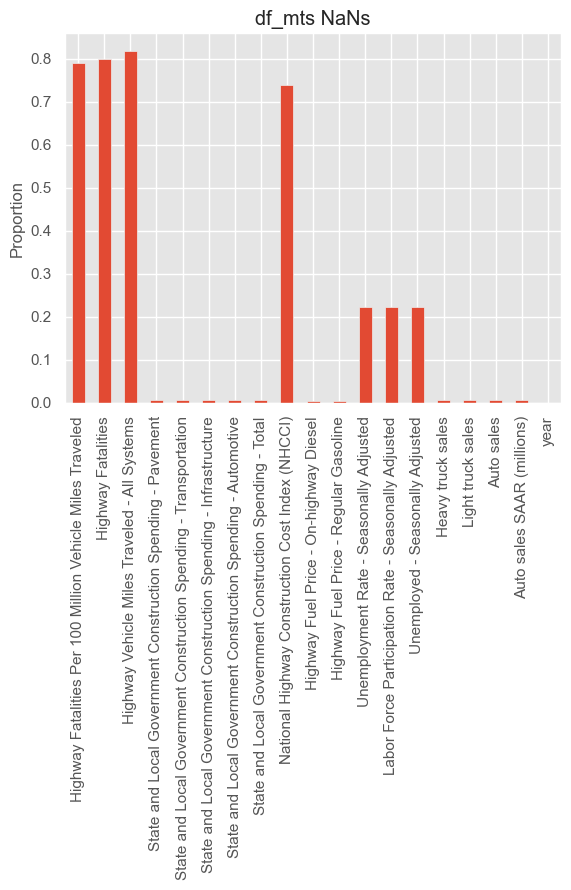

In [9]:
# Extract and create a new column year from the date column
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
year = df_mts['Date'].str.extract(r'/(\d+)\s12', expand=False).astype(int)
df_mts['year'] = year

#EDITED TO ADD MONTH COLUMN
df_mts['month'] = df_mts['Date'].str[:2]
df_mts

# Filter for years desired
### CHANGE FOR MORE YEARS? len(df) in range [2000, 2022] contains only 275 entries ###
df_mts = df_mts[(df_mts['year']<=2022) & (df_mts['year']>=2000)]

# Filter for columns wated
### CHANGE FOR MORE COLUMNS? ###
df_mts_column_filter = df_mts.columns[[2, 3, 12, 34, 45, 61, 76, 82, 83, 84, 85, 95, 96, 97, 117, 119, 120, 129, 135,136]]
df_mts = df_mts[df_mts_column_filter]

# Compute proportion of NaNs in each column
df_mts_nan_proportion = abs(df_mts.describe().iloc[0:1].sub(len(df_mts))).div(len(df_mts))
df_mts_nan_proportion = df_mts_nan_proportion.rename({'count':'NaN Proportion'})

# Visualize
print(df_mts_nan_proportion.squeeze()) # squeeze condenses a DataFrame to a Series
plt.title('df_mts NaNs')
df_mts_nan_proportion.squeeze().plot.bar()
plt.ylabel('Proportion')
plt.show()

The following colums have more than $50\%$ `NaN` values:
* Highway Fatalities Per 100 Million Vehicle Miles Traveled
* Highway Fatalities
* Highway Vehicle Miles Traveled - All Systems
* National Highway Construction Cost Index (NHCCI)

Maybe also drop these columns?

In [10]:
# Explore the types for all columns filtered so far
df_mts.dtypes

Highway Fatalities Per 100 Million Vehicle Miles Traveled            float64
Highway Fatalities                                                   float64
Highway Vehicle Miles Traveled - All Systems                         float64
State and Local Government Construction Spending - Pavement          float64
State and Local Government Construction Spending - Transportation    float64
State and Local Government Construction Spending - Infrastructure    float64
State and Local Government Construction Spending - Automotive        float64
State and Local Government Construction Spending - Total             float64
National Highway Construction Cost Index (NHCCI)                     float64
Highway Fuel Price - On-highway Diesel                               float64
Highway Fuel Price - Regular Gasoline                                float64
Unemployment Rate - Seasonally Adjusted                              float64
Labor Force Participation Rate - Seasonally Adjusted                 float64

In [11]:
# Print out new column numbers for faster nav
for i, column in enumerate(df_mts.columns):
    print(str(i) + " : " + column)

0 : Highway Fatalities Per 100 Million Vehicle Miles Traveled
1 : Highway Fatalities
2 : Highway Vehicle Miles Traveled - All Systems
3 : State and Local Government Construction Spending - Pavement
4 : State and Local Government Construction Spending - Transportation
5 : State and Local Government Construction Spending - Infrastructure
6 : State and Local Government Construction Spending - Automotive
7 : State and Local Government Construction Spending - Total
8 : National Highway Construction Cost Index (NHCCI)
9 : Highway Fuel Price - On-highway Diesel
10 : Highway Fuel Price - Regular Gasoline
11 : Unemployment Rate - Seasonally Adjusted
12 : Labor Force Participation Rate - Seasonally Adjusted
13 : Unemployed - Seasonally Adjusted
14 : Heavy truck sales
15 : Light truck sales
16 : Auto sales
17 : Auto sales SAAR (millions)
18 : year
19 : month


Only numerical data.

In [12]:
# Graphing helper method
# df: DataFrame grouped by year
# columns: list containing the GROUP of State and Local Government Construction Spending
# ie. State and Local Government Construction Spending - Pavement, GROUP = "Pavement"
# Plots line plot
def plot_line_year_agg(df_grouped, columns, log_transform, normalize):
    # RESET index so helper works
    df_grouped = df_grouped.reset_index()
    # Oh god code looking ugly 
    ### IF LOG TRANSFORM ###
    if log_transform:
        df_grouped = df_grouped.reset_index()
        # Loop to plot
        title_string = ""
        for column in columns:
            column_string = 'State and Local Government Construction Spending - ' + column
            plt.plot(df_grouped['year'], [np.log(data) if data!=0 else 0 for data in df_grouped[column_string]], label=column)
            title_string + title_string + column + ', '
    ### IF NORMALIZE ###
    elif normalize:
        # Loop to plot
        title_string = ""
        for column in columns:
            column_string = 'State and Local Government Construction Spending - ' + column
            plt.plot(df_grouped['year'], zscore(df_grouped[column_string]), label=column)
            title_string + title_string + column + ', '
    ### NEITHER LOG TRANSFORM OR NORMALIZE ###
    else:
        # Loop to plot
        title_string = ""
        for column in columns:
            column_string = 'State and Local Government Construction Spending - ' + column
            plt.plot(df_grouped['year'], df_grouped[column_string], label=column)
            title_string + title_string + column + ', '
        
    # legends & labels
    plt.legend()
    plt.title('Construction Spending over the Years: {}'.format(title_string[:-2])) # slicing to get rid of last comma
    if log_transform:
        plt.ylabel('log(Spending)')
    elif normalize:
        plt.ylabel('zscore(Spending)')
    else:
        plt.ylabel('Spending')
    plt.xlabel('Year')
    plt.show()

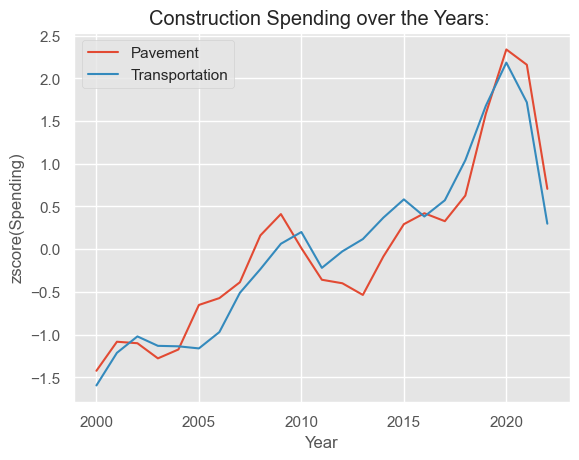

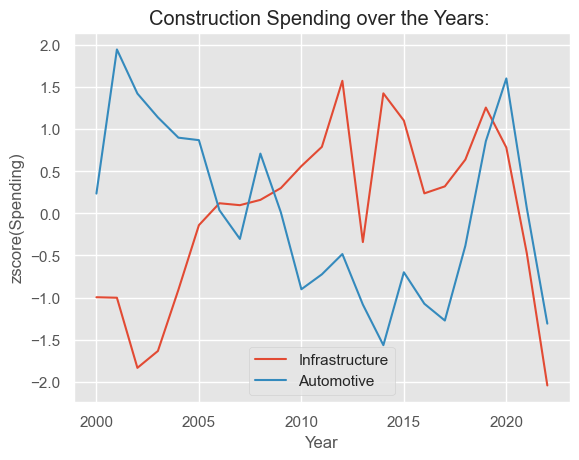

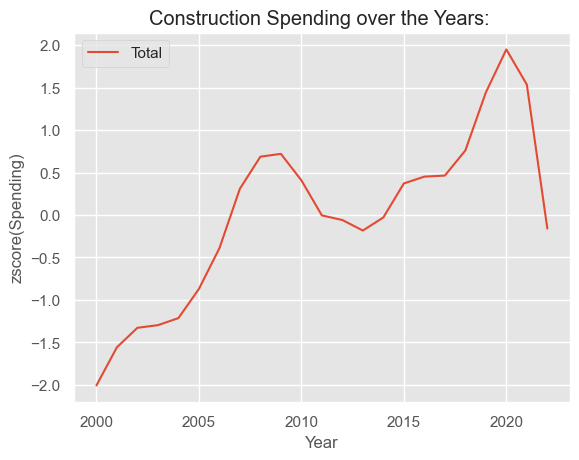

In [13]:
# aggregate by year to determine total spending on State and Local Government Construction Spending
df_mts_grouped_year = df_mts.groupby('year').sum()
plot_line_year_agg(df_mts_grouped_year, ['Pavement', 'Transportation'], False, True)
plot_line_year_agg(df_mts_grouped_year, ['Infrastructure', 'Automotive'], False, True)
plot_line_year_agg(df_mts_grouped_year, ['Total'], False, True)

In [14]:
# Begin connecting above df with df_gdp (U.S. GDP 1960-2022 dataset)
# Preprocessing on 'date' column of df_gdp
df_gdp_year = df_gdp['date'].str.extract('(\d+)-', expand=False)
df_gdp['year'] = df_gdp_year.astype(int)
df_gdp

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change,year
0,1960-12-31,543.300000,3007.1234,NaN,1960
1,1961-12-31,563.300000,3066.5629,2.3000,1961
2,1962-12-31,605.100000,3243.8431,6.1000,1962
3,1963-12-31,638.600000,3374.5152,4.4000,1963
4,1964-12-31,685.800000,3573.9412,5.8000,1964
...,...,...,...,...,...
57,2017-12-31,19479.620056,59914.7778,2.2557,2017
58,2018-12-31,20527.156026,62805.2538,2.9189,2018
59,2019-12-31,21372.572437,65094.7994,2.2889,2019
60,2020-12-31,20893.743833,63027.6795,-3.4046,2020


In [15]:
# PERFORM LEFT JOIN on 'year'
# First group by year on df_mts (don't want duplicate years)
df_mts_grouped_year = df_mts.groupby('year').sum()
df_mts_gdp = df_mts_grouped_year.merge(df_gdp, how='left', left_on='year', right_on='year')
df_mts_gdp.columns

Index(['year', 'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities', 'Highway Vehicle Miles Traveled - All Systems',
       'State and Local Government Construction Spending - Pavement',
       'State and Local Government Construction Spending - Transportation',
       'State and Local Government Construction Spending - Infrastructure',
       'State and Local Government Construction Spending - Automotive',
       'State and Local Government Construction Spending - Total',
       'National Highway Construction Cost Index (NHCCI)',
       'Highway Fuel Price - On-highway Diesel',
       'Highway Fuel Price - Regular Gasoline',
       'Unemployment Rate - Seasonally Adjusted',
       'Labor Force Participation Rate - Seasonally Adjusted',
       'Unemployed - Seasonally Adjusted', 'Heavy truck sales',
       'Light truck sales', 'Auto sales', 'Auto sales SAAR (millions)', 'date',
       ' GDP ( Billions of US $)', ' Per Capita (US $)', ' Annual % Chang

In [16]:
# Similar helper as above, also plots GDP
# Calls previous helper plot_line_year_agg
### NEED TO PLOT NORMALIZED OTHERWISE SCALED IS SCREWED
### LOG TRANSFORM?
def plot_line_year_gdp(df_merged, columns):
    # Necessary preprocessing to get zscore (normalization)
    df_merged['GDP ($)'] = df_merged[' GDP ( Billions of US $)'] * 10**9 # WHY IS THERE A SPACE B4 GDP
    normalized_data = zscore(np.array(df_merged['GDP ($)']).reshape(-1, 1)[:-1]) # -1 cuz last element is a NaN
    plt.plot(df_merged['year'][:-1], normalized_data, label='GDP ($)')
    plot_line_year_agg(df_merged, columns, False, True) # SET NORMALIZE TO TRUE

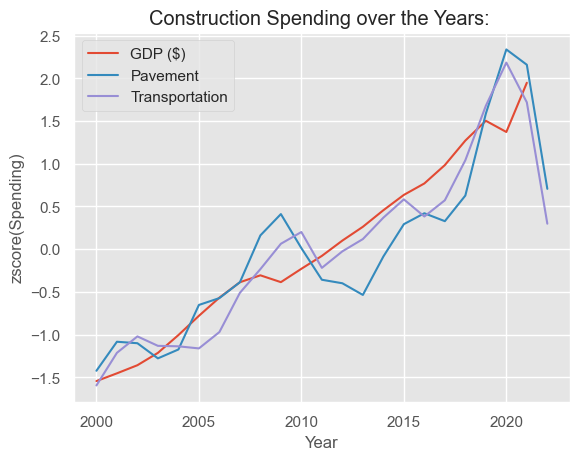

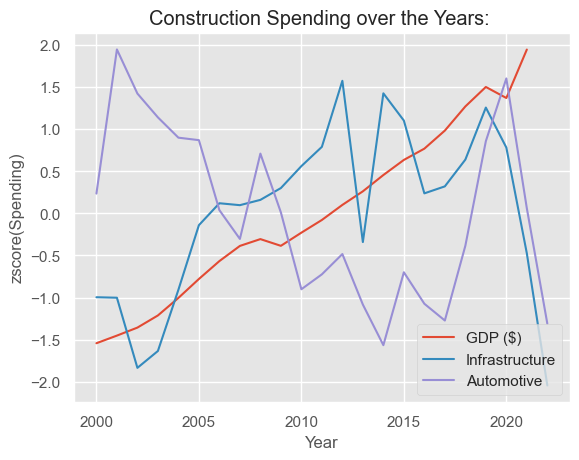

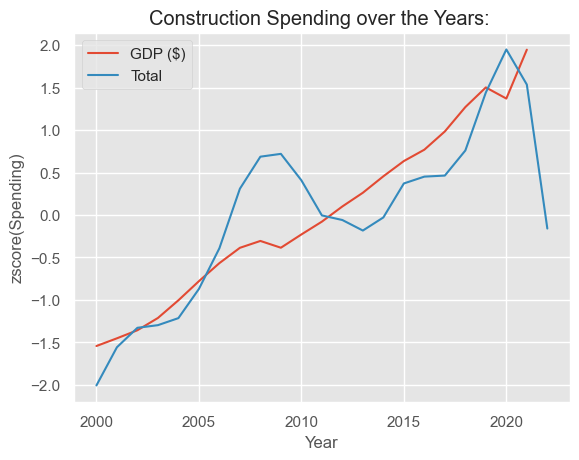

In [17]:
# Use helper
plot_line_year_gdp(df_mts_gdp, ['Pavement', 'Transportation'])
plot_line_year_gdp(df_mts_gdp, ['Infrastructure', 'Automotive'])
plot_line_year_gdp(df_mts_gdp, ['Total'])

The code for the helpers is horrible. But finally got it to work. 👍

From visuals above:

- Overall if Total Construction Spending increased, so did GDP; except for the most recent years
- Automotive spending doesn't seem to be tightly correlated with GDP? What happend in 2010 - 2018?
- In general spending on pavement and transportation is positively correlated with GDP

In [18]:
# Looking at column names. No idea why there is a space in front of some columns...
for col in df_mts_gdp.columns:
    print(col)

year
Highway Fatalities Per 100 Million Vehicle Miles Traveled
Highway Fatalities
Highway Vehicle Miles Traveled - All Systems
State and Local Government Construction Spending - Pavement
State and Local Government Construction Spending - Transportation
State and Local Government Construction Spending - Infrastructure
State and Local Government Construction Spending - Automotive
State and Local Government Construction Spending - Total
National Highway Construction Cost Index (NHCCI)
Highway Fuel Price - On-highway Diesel
Highway Fuel Price - Regular Gasoline
Unemployment Rate - Seasonally Adjusted
Labor Force Participation Rate - Seasonally Adjusted
Unemployed - Seasonally Adjusted
Heavy truck sales
Light truck sales
Auto sales
Auto sales SAAR (millions)
date
 GDP ( Billions of US $)
 Per Capita (US $)
 Annual % Change
GDP ($)


In [19]:
# ADDITIONAL EDA on the MONTHLY GDP DATASET that was added 12/5
# TEMP, put here so I can rerun cells
df_gdp_monthly = pd.read_csv('usa_gdp_monthly.csv')
df_gdp_monthly

# Extract year and month in the DATE column.
df_gdp_monthly['Year'] = df_gdp_monthly['DATE'].str.extract(r'([\d]{4})-')
df_gdp_monthly['Month'] = df_gdp_monthly['DATE'].str.extract(r'-([\d]+)-')

# Renaming
df_gdp_monthly = df_gdp_monthly.rename(columns={'DATE':'date', 'USALORSGPNOSTSAM':'GDP'})

# Calculate percent change in GDP per month.
# instantiate a null value at the beginning
prev_gdps = np.array([101.009477]) # hard coded a number in, it's the start so this number doesn't matter
prev_gdps = np.append(prev_gdps, df_gdp_monthly['GDP'][:-1])
df_gdp_monthly['Prev_GDP'] = prev_gdps

# Use formula: (previous - new) / previous * 100
df_gdp_monthly['Monthly_Percent_Change'] = (df_gdp_monthly['Prev_GDP'] - df_gdp_monthly['GDP'])/df_gdp_monthly['Prev_GDP']*100
df_gdp_monthly


,date,GDP,Year,Month,Prev_GDP,Monthly_Percent_Change
0,1960-01-01,101.009477,1960,01,101.009477,-2.553018e-07
1,1960-02-01,101.019803,1960,02,101.009477,-1.022247e-02
2,1960-03-01,100.943976,1960,03,101.019803,7.506114e-02
3,1960-04-01,100.784465,1960,04,100.943976,1.580195e-01
4,1960-05-01,100.560223,1960,05,100.784465,2.224970e-01
...,...,...,...,...,...,...
747,2022-04-01,99.916264,2022,04,100.051371,1.350373e-01
748,2022-05-01,99.810129,2022,05,99.916264,1.062240e-01
749,2022-06-01,99.741208,2022,06,99.810129,6.905201e-02
750,2022-07-01,99.703565,2022,07,99.741208,3.774144e-02


In [20]:
df_camr['sub_region_1'].unique()

array([nan, 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

Will be focusing analysis on just California.

In [21]:
# Filter for only California
df_camr_CA = df_camr[df_camr['sub_region_1'] == 'California']
df_camr_CA['sub_region_2'].unique()

array([nan, 'Alameda County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
       'Napa County', 'Nevada County', 'Orange County', 'Placer County',
       'Plumas County', 'Riverside County', 'Sacramento County',
       'San Benito County', 'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Siskiyou County', 'Solano County',
       'Sonoma County', 'St

In [22]:
# Google: Daily Community Mobility Data
df_camr = pd.read_csv('2020_Mobility_Report.csv')
df_camr.head(10)

# Filter for only California
df_camr_CA = df_camr[df_camr['sub_region_1'] == 'California']

# Extract year and month in the DATE column.
df_camr_CA['Year'] = df_camr_CA['date'].str.extract(r'([\d]{4})-')
df_camr_CA['Month'] = df_camr_CA['date'].str.extract(r'-([\d]+)-')

df_camr_CA.groupby(['Year', 'Month']).mean()

metro_area  census_fips_code  \
Year Month                                 
2020 02            NaN       6058.449102   
     03            NaN       6058.441807   
     04            NaN       6058.270108   
     05            NaN       6058.167542   
     06            NaN       6058.196622   
     07            NaN       6058.200234   
     08            NaN       6060.219321   
     09            NaN       6059.555267   
     10            NaN       6058.172616   
     11            NaN       6058.179735   
     12            NaN       6058.216783   

            retail_and_recreation_percent_change_from_baseline  \
Year Month                                                       
2020 02                                              6.280952    
     03                                            -17.377880    
     04                                            -45.715553    
     05                                            -36.655128    
     06                                            -22.725837    
     07                                            -19.716901    
     08                                            -22.221748    
     09                                            -21.483240    
     10                                            -17.717325    
     11                                            -21.398113    
     12                                            -25.586480    

            grocery_and_pharmacy_percent_change_from_baseline  \
Year Month                                                      
2020 02                                              3.099408   
     03                                              0.167808   
     04                                            -13.588567   
     05                                             -1.680509   
     06                                              1.942000   
     07                                              1.209468   
     08                                             -4.120729   
     09                                             -6.855234   
     10                                             -5.047865   
     11                                             -7.317269   
     12                                             -6.753063   

            parks_percent_change_from_baseline  \
Year Month                                       
2020 02                              27.693572   
     03                              -4.815156   
     04                             -24.117474   
     05                              -0.437408   
     06                              29.917526   
     07                              44.395604   
     08                              29.255319   
     09                               5.717571   
     10                               8.384786   
     11                              -7.425296   
     12                             -17.952784   

            transit_stations_percent_change_from_baseline  \
Year Month                                                  
2020 02                                          2.965630   
     03                                        -21.673813   
     04                                        -40.739030   
     05                                        -30.033911   
     06                                        -20.405763   
     07                                        -20.131259   
     08                                        -25.650246   
     09                                        -26.112037   
     10                                        -24.554389   
     11                                        -31.923256   
     12                                        -36.940432   

            workplaces_percent_change_from_baseline  \
Year Month                                            
2020 02                                   -1.965517   
     03                                  -19.524928   
     04                                  -42.781582   
     05       

In [23]:
df_camr_CA['Year']

48065    2020
48066    2020
48067    2020
48068    2020
48069    2020
         ... 
65846    2020
65847    2020
65848    2020
65849    2020
65850    2020
Name: Year, Length: 17786, dtype: object

So apparently there is only data for the year 2020 in California. I guess we'll just analyze those 12 months.

Going to first do some renaming of columns:

In [24]:
df_camr_CA = df_camr_CA.rename(columns={'retail_and_recreation_percent_change_from_baseline':'retail/rec',
                                        'grocery_and_pharmacy_percent_change_from_baseline':'grocery/pharm',
                                        'parks_percent_change_from_baseline':'parks',
                                        'transit_stations_percent_change_from_baseline':'transit_stations',
                                        'workplaces_percent_change_from_baseline':'workplaces',
                                        'residential_percent_change_from_baseline':'residential'})
df_camr_CA_reduced = df_camr_CA.groupby(['Year', 'Month']).mean()[['retail/rec', 'grocery/pharm', 'parks', 'transit_stations', 'workplaces', 'residential']]
df_camr_CA_reduced = df_camr_CA_reduced.reset_index()
df_camr_CA_reduced

,Year,Month,retail/rec,grocery/pharm,parks,transit_stations,workplaces,residential
0,2020,02,6.280952,3.099408,27.693572,2.965630,-1.965517,-0.049419
1,2020,03,-17.377880,0.167808,-4.815156,-21.673813,-19.524928,8.637944
2,2020,04,-45.715553,-13.588567,-24.117474,-40.739030,-42.781582,17.681216
3,2020,05,-36.655128,-1.680509,-0.437408,-30.033911,-34.357798,13.502950
4,2020,06,-22.725837,1.942000,29.917526,-20.405763,-27.845972,9.799851
5,2020,07,-19.716901,1.209468,44.395604,-20.131259,-31.166284,9.888487
6,2020,08,-22.221748,-4.120729,29.255319,-25.650246,-30.304203,8.975983
7,2020,09,-21.483240,-6.855234,5.717571,-26.112037,-29.143603,8.683480
8,2020,10,-17.717325,-5.047865,8.384786,-24.554389,-24.983908,7.595349
9,2020,11,-21.398113,-7.317269,-7.425296,-31.923256,-28.879147,9.890809


## Visualization 2
Plot a line plot of changes in mobility categories over the 12 months during COVID year 2020:

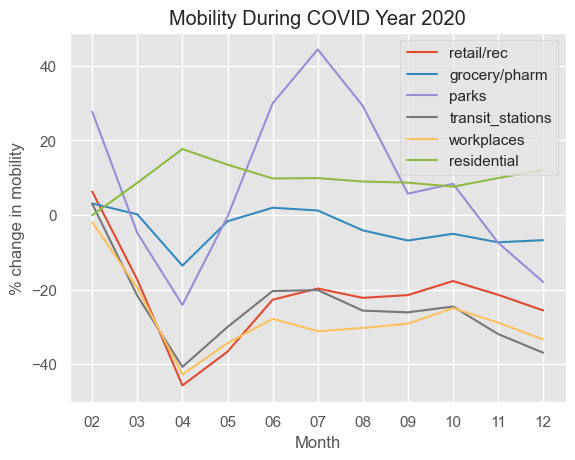

In [25]:
def plot_line_mobility(df):
    # get x values
    month = df['Month']
    
    
    # get y values
    for mobility_column in df.columns[2:]: # skip year and month column
        percent_mobility_change = df[mobility_column]
        plt.plot(month, percent_mobility_change, label=mobility_column)
    
    plt.title('Mobility During COVID Year 2020')
    plt.xlabel('Month')
    plt.ylabel('% change in mobility')
    plt.legend();
    plt.show()

plot_line_mobility(df_camr_CA_reduced)

Will now convert each column to a categorical. If the absolute change is greater than $5\%$, it will take on a value of $1$ otherwise $0$.

In [26]:
for column in df_camr_CA_reduced.columns[2:]: # from index 2 on wards since we don't care about year/month
    df_camr_CA_reduced[column] = (abs(df_camr_CA_reduced[column]) > 10) * 1 # multiply by a scalar to convert bool to int
df_camr_CA_reduced

,Year,Month,retail/rec,grocery/pharm,parks,transit_stations,workplaces,residential
0,2020,02,0,0,1,0,0,0
1,2020,03,1,0,0,1,1,0
2,2020,04,1,1,1,1,1,1
3,2020,05,1,0,0,1,1,1
4,2020,06,1,0,1,1,1,0
5,2020,07,1,0,1,1,1,0
6,2020,08,1,0,1,1,1,0
7,2020,09,1,0,0,1,1,0
8,2020,10,1,0,0,1,1,0
9,2020,11,1,0,0,1,1,0


Need to now merge `df_camr_CA_reduced` with `df_gdp_monthly`.

Begin by filter `df_gdp_monthly` for only the year $2020$

In [27]:
# Taking a closer look again at the Year column
df_gdp_monthly['Year'].unique()

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

`Year` column in `df_gdp_monthly` is of type `object`, need to convert to `int`.

In [28]:
# Converting Year column to int
df_gdp_monthly['Year'] = df_gdp_monthly['Year'].astype(int)

# Now we can filter
df_gdp_monthly_2020 = df_gdp_monthly[df_gdp_monthly['Year']==2020]

# Only care about columns Month and Monthly_Percent_Change
df_gdp_monthly_2020_reduced = df_gdp_monthly_2020[['Month', 'Monthly_Percent_Change']]

# Drop the first row since the first row was fabricated to prevent NaN values
df_gdp_monthly_2020_reduced = df_gdp_monthly_2020_reduced.drop(index=df_gdp_monthly_2020_reduced.index[0], axis=0)
df_gdp_monthly_2020_reduced

# Now join with df_camr_CA_reduced on month
df_camr_gdp_merged = df_camr_CA_reduced.merge(right=df_gdp_monthly_2020_reduced, how='inner', on='Month')
df_camr_gdp_merged

# Select the columns we want by simply dropping the Year column
df_camr_gdp_merged = df_camr_gdp_merged.drop('Year', axis=1)
df_camr_gdp_merged

,Month,retail/rec,grocery/pharm,parks,transit_stations,workplaces,residential,Monthly_Percent_Change
0,02,0,0,1,0,0,0,0.016457
1,03,1,0,0,1,1,0,4.538076
2,04,1,1,1,1,1,1,3.054200
3,05,1,0,0,1,1,1,1.610227
4,06,1,0,1,1,1,0,-2.058870
5,07,1,0,1,1,1,0,-1.997655
6,08,1,0,1,1,1,0,-1.936215
7,09,1,0,0,1,1,0,-0.140256
8,10,1,0,0,1,1,0,-0.144151
9,11,1,0,0,1,1,0,-0.160329


## Visualization 3

In [29]:
# take the US covid mobility dataset for the past 3 years
# average this because we don't have any specific regional dataset 

# Compare these against spending 

# optional 
# Auto Sales - confounder, reflection of the economic state
# Highway fuel price - confounder reflection of the economy
# Construction Spending - our given question

In [30]:
df_2020 = pd.read_csv('2020_Mobility_Report.csv')
df_2020[["year", "month", "day"]] = df_2020["date"].str.split("-", expand = True).astype(int)
df_2020 = df_2020.groupby(['year','month']).mean()
df_2020.head()

metro_area  census_fips_code  \
year month                                 
2020 2             NaN      30335.466212   
     3             NaN      30341.198683   
     4             NaN      30349.272816   
     5             NaN      30372.493874   
     6             NaN      30351.631961   

            retail_and_recreation_percent_change_from_baseline  \
year month                                                       
2020 2                                               6.145196    
     3                                             -10.379869    
     4                                             -34.688613    
     5                                             -15.271136    
     6                                              -3.024183    

            grocery_and_pharmacy_percent_change_from_baseline  \
year month                                                      
2020 2                                               2.103233   
     3                                               5.360028   
     4                                              -9.515706   
     5                                               2.834255   
     6                                               7.141806   

            parks_percent_change_from_baseline  \
year month                                       
2020 2                               14.454504   
     3                               14.432377   
     4                                1.069038   
     5                               38.376006   
     6                               68.486314   

            transit_stations_percent_change_from_baseline  \
year month                                                  
2020 2                                           4.253531   
     3                                          -8.988731   
     4                                         -31.144862   
     5                                         -16.831389   
     6                                          -5.046891   

            workplaces_percent_change_from_baseline  \
year month                                            
2020 2                                    -0.086161   
     3                                   -14.747643   
     4                                   -37.378917   
     5                                   -28.982362   
     6                                   -22.866399   

            residential_percent_change_from_baseline        day  
year month                                                       
2020 2                                      0.232813  22.024191  
     3                                      6.571577  16.083913  
     4                                     16.550969  15.411127  
     5                                     11.671517  15.934920  
     6                                      7.511058  15.397341

In [31]:
df_2021 = pd.read_csv('2021_Mobility_Report.csv')
df_2021[["year", "month", "day"]] = df_2021["date"].str.split("-", expand = True).astype(int)
df_2021 = df_2021.groupby(['year','month']).mean()
df_2021.head()

metro_area  census_fips_code  \
year month                                 
2021 1             NaN      30364.780196   
     2             NaN      30366.091153   
     3             NaN      30335.575201   
     4             NaN      30335.291028   
     5             NaN      30352.802416   

            retail_and_recreation_percent_change_from_baseline  \
year month                                                       
2021 1                                             -18.736443    
     2                                             -17.121149    
     3                                              -0.483461    
     4                                               2.393818    
     5                                               5.754814    

            grocery_and_pharmacy_percent_change_from_baseline  \
year month                                                      
2021 1                                              -9.906860   
     2                                              -7.962159   
     3                                               0.422380   
     4                                               4.203664   
     5                                               9.848665   

            parks_percent_change_from_baseline  \
year month                                       
2021 1                              -13.880025   
     2                              -16.770441   
     3                               17.103678   
     4                               37.023646   
     5                               54.820548   

            transit_stations_percent_change_from_baseline  \
year month                                                  
2021 1                                         -21.702128   
     2                                         -20.958099   
     3                                          -5.895302   
     4                                          -1.405187   
     5                                           2.615845   

            workplaces_percent_change_from_baseline  \
year month                                            
2021 1                                   -21.924905   
     2                                   -21.910110   
     3                                   -17.815694   
     4                                   -18.119635   
     5                                   -18.411521   

            residential_percent_change_from_baseline        day  
year month                                                       
2021 1                                      9.544251  15.968606  
     2                                      9.199857  14.320185  
     3                                      5.401662  15.936426  
     4                                      4.283575  15.571876  
     5                                      3.374142  16.040473

In [32]:
df_2022 = pd.read_csv('2022_Mobility_Report.csv')
df_2022[["year", "month", "day"]] = df_2022["date"].str.split("-", expand = True).astype(int)
df_2022 = df_2022.groupby(['year','month']).mean()
df_2022.head()

metro_area  census_fips_code  \
year month                                 
2022 1             NaN      30368.440938   
     2             NaN      30354.845417   
     3             NaN      30348.371343   
     4             NaN      30367.329286   
     5             NaN      30363.323584   

            retail_and_recreation_percent_change_from_baseline  \
year month                                                       
2022 1                                             -13.565027    
     2                                              -5.464329    
     3                                              -1.993282    
     4                                               0.850551    
     5                                               5.154013    

            grocery_and_pharmacy_percent_change_from_baseline  \
year month                                                      
2022 1                                              -3.180445   
     2                                               0.007143   
     3                                              -0.585566   
     4                                               3.040810   
     5                                               7.649427   

            parks_percent_change_from_baseline  \
year month                                       
2022 1                              -13.847191   
     2                                1.873881   
     3                               18.024373   
     4                               35.818017   
     5                               52.762716   

            transit_stations_percent_change_from_baseline  \
year month                                                  
2022 1                                         -13.199217   
     2                                          -8.306109   
     3                                          -3.422697   
     4                                          -1.476036   
     5                                           1.162369   

            workplaces_percent_change_from_baseline  \
year month                                            
2022 1                                   -18.186162   
     2                                   -13.602249   
     3                                   -10.792810   
     4                                   -10.965035   
     5                                   -13.320391   

            residential_percent_change_from_baseline        day  
year month                                                       
2022 1                                      7.976264  16.004738  
     2                                      5.210843  14.390825  
     3                                      3.612448  15.991274  
     4                                      2.618157  15.548840  
     5                                      2.133872  16.027742

In [33]:
all_mobility = df_2020.append(df_2021).append(df_2022)
all_mobility.drop(columns = ['day','metro_area','census_fips_code'], inplace = True)
all_mobility.head()

retail_and_recreation_percent_change_from_baseline  \
year month                                                       
2020 2                                               6.145196    
     3                                             -10.379869    
     4                                             -34.688613    
     5                                             -15.271136    
     6                                              -3.024183    

            grocery_and_pharmacy_percent_change_from_baseline  \
year month                                                      
2020 2                                               2.103233   
     3                                               5.360028   
     4                                              -9.515706   
     5                                               2.834255   
     6                                               7.141806   

            parks_percent_change_from_baseline  \
year month                                       
2020 2                               14.454504   
     3                               14.432377   
     4                                1.069038   
     5                               38.376006   
     6                               68.486314   

            transit_stations_percent_change_from_baseline  \
year month                                                  
2020 2                                           4.253531   
     3                                          -8.988731   
     4                                         -31.144862   
     5                                         -16.831389   
     6                                          -5.046891   

            workplaces_percent_change_from_baseline  \
year month                                            
2020 2                                    -0.086161   
     3                                   -14.747643   
     4                                   -37.378917   
     5                                   -28.982362   
     6                                   -22.866399   

            residential_percent_change_from_baseline  
year month                                            
2020 2                                      0.232813  
     3                                      6.571577  
     4                                     16.550969  
     5                                     11.671517  
     6                                      7.511058

In [34]:
df_mts.columns

Index(['Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities', 'Highway Vehicle Miles Traveled - All Systems',
       'State and Local Government Construction Spending - Pavement',
       'State and Local Government Construction Spending - Transportation',
       'State and Local Government Construction Spending - Infrastructure',
       'State and Local Government Construction Spending - Automotive',
       'State and Local Government Construction Spending - Total',
       'National Highway Construction Cost Index (NHCCI)',
       'Highway Fuel Price - On-highway Diesel',
       'Highway Fuel Price - Regular Gasoline',
       'Unemployment Rate - Seasonally Adjusted',
       'Labor Force Participation Rate - Seasonally Adjusted',
       'Unemployed - Seasonally Adjusted', 'Heavy truck sales',
       'Light truck sales', 'Auto sales', 'Auto sales SAAR (millions)', 'year',
       'month'],
      dtype='object')

In [35]:
df_mts_2020plus = df_mts[df_mts['year'] >= 2020]
df_mts_2020plus['month'] = df_mts_2020plus['month'].astype(str).astype(int)
df_mts_2020plus = df_mts_2020plus.groupby(['year','month']).mean()
df_mts_2020plus.drop(df_mts_2020plus.tail(1).index,inplace=True)
df_mts_2020plus.head()

Highway Fatalities Per 100 Million Vehicle Miles Traveled  \
year month                                                              
2020 1                                                   1.08           
     2                                                    NaN           
     3                                                    NaN           
     4                                                   1.43           
     5                                                    NaN           

            Highway Fatalities  Highway Vehicle Miles Traveled - All Systems  \
year month                                                                     
2020 1                  7900.0                                  2.608470e+11   
     2                     NaN                                  2.426950e+11   
     3                     NaN                                  2.266380e+11   
     4                  9120.0                                  1.676170e+11   
     5                     NaN                                  2.210060e+11   

            State and Local Government Construction Spending - Pavement  \
year month                                                                
2020 1                                           3.220000e+09             
     2                                           3.475000e+09             
     3                                           4.055000e+09             
     4                                           5.159000e+09             
     5                                           6.814000e+09             

            State and Local Government Construction Spending - Transportation  \
year month                                                                      
2020 1                                           2.879000e+09                   
     2                                           2.948000e+09                   
     3                                           3.094000e+09                   
     4                                           3.195000e+09                   
     5                                           3.560000e+09                   

            State and Local Government Construction Spending - Infrastructure  \
year month                                                                      
2020 1                                            121000000.0                   
     2                                            114000000.0                   
     3                                            127000000.0                   
     4                                            121000000.0                   
     5                                            135000000.0                   

            State and Local Government Construction Spending - Automotive  \
year month                                                                  
2020 1                                            151000000.0               
     2                                            162000000.0               
     3                                            154000000.0               
     4                                            155000000.0               
     5                                            150000000.0               

            State and Local Government Construction Spending - Total  \
year month                                                             
2020 1                                           2.177500e+10          
     2                                           2.236600e+10          
     3                                           2.406000e+10          
     4                                           2.649300e+10          
     5                                           3.015900e+10          

            National Highway Construction Cost Index (NHCCI)  \
year month                                                     
2020 1                                                   NaN   
     2                                  

In [36]:
mobilityxspending = df_mts_2020plus.join(all_mobility)
mobilityxspending.head()

Highway Fatalities Per 100 Million Vehicle Miles Traveled  \
year month                                                              
2020 1                                                   1.08           
     2                                                    NaN           
     3                                                    NaN           
     4                                                   1.43           
     5                                                    NaN           

            Highway Fatalities  Highway Vehicle Miles Traveled - All Systems  \
year month                                                                     
2020 1                  7900.0                                  2.608470e+11   
     2                     NaN                                  2.426950e+11   
     3                     NaN                                  2.266380e+11   
     4                  9120.0                                  1.676170e+11   
     5                     NaN                                  2.210060e+11   

            State and Local Government Construction Spending - Pavement  \
year month                                                                
2020 1                                           3.220000e+09             
     2                                           3.475000e+09             
     3                                           4.055000e+09             
     4                                           5.159000e+09             
     5                                           6.814000e+09             

            State and Local Government Construction Spending - Transportation  \
year month                                                                      
2020 1                                           2.879000e+09                   
     2                                           2.948000e+09                   
     3                                           3.094000e+09                   
     4                                           3.195000e+09                   
     5                                           3.560000e+09                   

            State and Local Government Construction Spending - Infrastructure  \
year month                                                                      
2020 1                                            121000000.0                   
     2                                            114000000.0                   
     3                                            127000000.0                   
     4                                            121000000.0                   
     5                                            135000000.0                   

            State and Local Government Construction Spending - Automotive  \
year month                                                                  
2020 1                                            151000000.0               
     2                                            162000000.0               
     3                                            154000000.0               
     4                                            155000000.0               
     5                                            150000000.0               

            State and Local Government Construction Spending - Total  \
year month                                                             
2020 1                                           2.177500e+10          
     2                                           2.236600e+10          
     3                                           2.406000e+10          
     4                                           2.649300e+10          
     5                                           3.015900e+10          

            National Highway Construction Cost Index (NHCCI)  \
year month                                                     
2020 1                                                   NaN   
     2                                  

In [37]:
df2 = mobilityxspending.reset_index()
df2['year'] = df2['year'].astype(str)
df2['month'] = df2['month'].astype(str)
df2['date2'] = df2['month'] + "/" + df2['year']
date_time = pd.to_datetime(df2['date2'])
df2['date'] = date_time
df2.head()

,year,month,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,Highway Vehicle Miles Traveled - All Systems,State and Local Government Construction Spending - Pavement,State and Local Government Construction Spending - Transportation,State and Local Government Construction Spending - Infrastructure,State and Local Government Construction Spending - Automotive,State and Local Government Construction Spending - Total,...,Auto sales,Auto sales SAAR (millions),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date2,date
0,2020,1,1.08,7900.0,2.608470e+11,3.220000e+09,2.879000e+09,121000000.0,151000000.0,2.177500e+10,...,293200.0,4306000.0,NaN,NaN,NaN,NaN,NaN,NaN,1/2020,2020-01-01
1,2020,2,NaN,NaN,2.426950e+11,3.475000e+09,2.948000e+09,114000000.0,162000000.0,2.236600e+10,...,346500.0,4176000.0,6.145196,2.103233,14.454504,4.253531,-0.086161,0.232813,2/2020,2020-02-01
2,2020,3,NaN,NaN,2.266380e+11,4.055000e+09,3.094000e+09,127000000.0,154000000.0,2.406000e+10,...,264700.0,2847000.0,-10.379869,5.360028,14.432377,-8.988731,-14.747643,6.571577,3/2020,2020-03-01
3,2020,4,1.43,9120.0,1.676170e+11,5.159000e+09,3.195000e+09,121000000.0,155000000.0,2.649300e+10,...,166400.0,1898000.0,-34.688613,-9.515706,1.069038,-31.144862,-37.378917,16.550969,4/2020,2020-04-01
4,2020,5,NaN,NaN,2.210060e+11,6.814000e+09,3.560000e+09,135000000.0,150000000.0,3.015900e+10,...,258500.0,2625000.0,-15.271136,2.834255,38.376006,-16.831389,-28.982362,11.671517,5/2020,2020-05-01


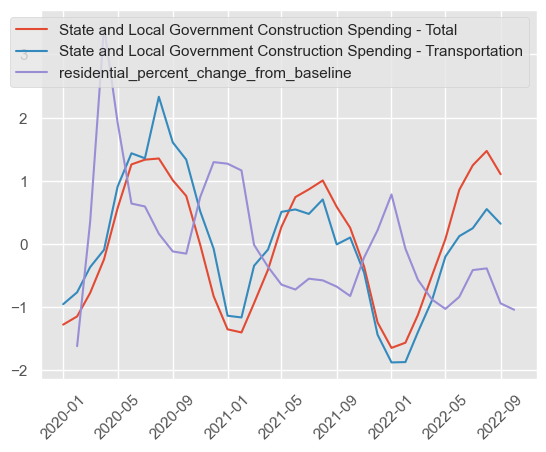

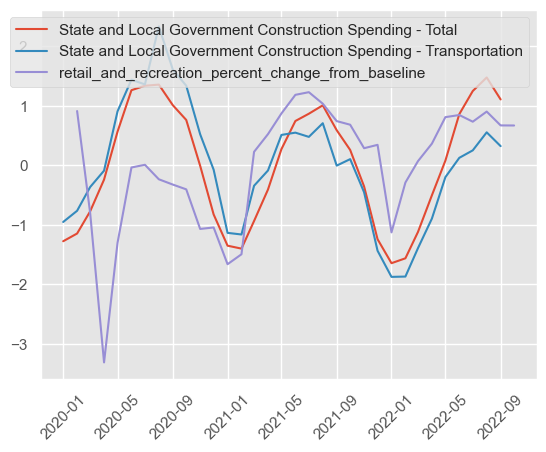

In [38]:
# Plotting two columns at a time because Jupyter Notebook condenses them and it doesn't show up
# on well as a .pdf file

arr = ["residential_percent_change_from_baseline","retail_and_recreation_percent_change_from_baseline"]
for i in arr: 
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Total"],nan_policy='omit'), label = "State and Local Government Construction Spending - Total")
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Transportation"],nan_policy='omit'), label = "State and Local Government Construction Spending - Transportation")
    plt.plot(df2["date"],zscore(df2[i],nan_policy='omit'), label = i)
    plt.legend(loc="upper right")
    plt.xticks(rotation = 45)
    plt.show()

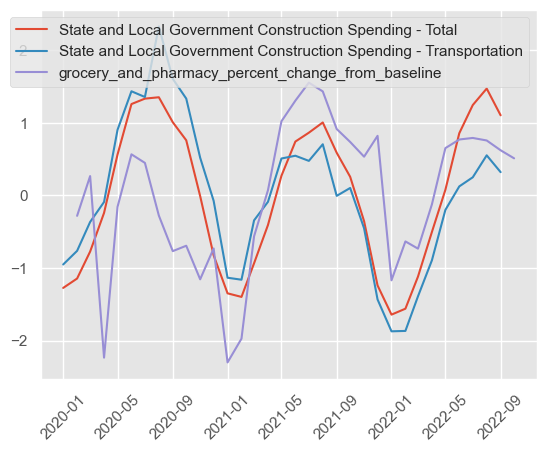

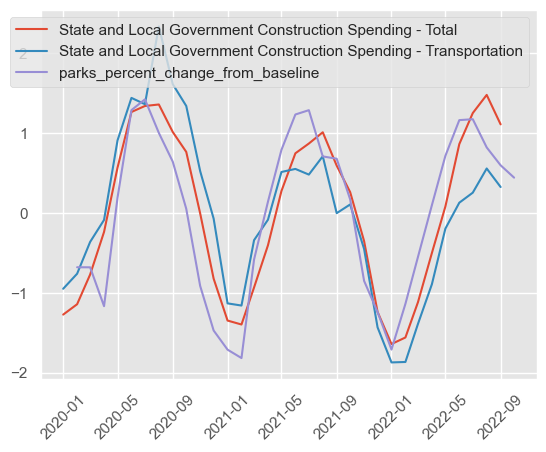

In [39]:
arr2 = ["grocery_and_pharmacy_percent_change_from_baseline","parks_percent_change_from_baseline"]
for i in arr2: 
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Total"],nan_policy='omit'), label = "State and Local Government Construction Spending - Total")
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Transportation"],nan_policy='omit'), label = "State and Local Government Construction Spending - Transportation")
    plt.plot(df2["date"],zscore(df2[i],nan_policy='omit'), label = i)
    plt.legend(loc="upper right")
    plt.xticks(rotation = 45)
    plt.show()

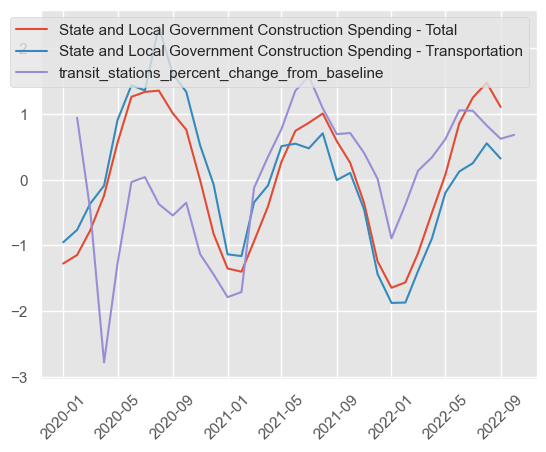

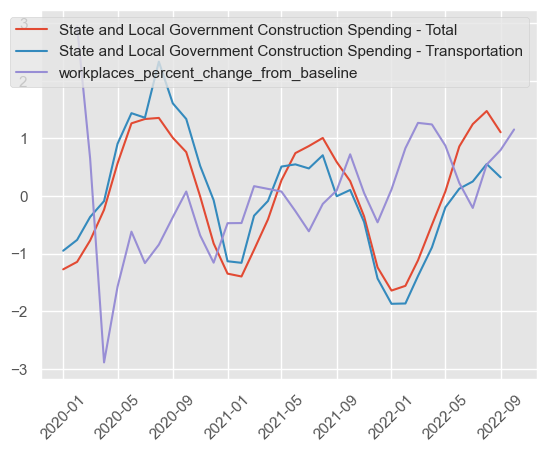

In [40]:
arr3 = ["transit_stations_percent_change_from_baseline","workplaces_percent_change_from_baseline"]
for i in arr3: 
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Total"],nan_policy='omit'), label = "State and Local Government Construction Spending - Total")
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Transportation"],nan_policy='omit'), label = "State and Local Government Construction Spending - Transportation")
    plt.plot(df2["date"],zscore(df2[i],nan_policy='omit'), label = i)
    plt.legend(loc="upper right")
    plt.xticks(rotation = 45)
    plt.show()

## Visualization 4

In [41]:
url = "https://data.bts.gov/resource/crem-w557.json"
r = requests.get(url)
data = pd.DataFrame(r.json())
mob_data = data.drop(['index'], axis = 1)
date_dict = {'01': 'Jan',
             '02': 'Feb',
             '03': 'Mar',
             '04': 'Apr',
             '05': 'May',
             '06': 'Jun',
             '07': 'Jul',
             '08': 'Aug',
             '09': 'Sep',
             '10': 'Oct',
             '11': 'Nov',
             '12': 'Dec'}

fatalities = mob_data[~mob_data['safety_highway_fatalities_1'].isna()]
fatalities = fatalities[['date','safety_highway_fatalities_1','highway_fuel_prices_regular', 'transportation_economic_3', 
                         'transportation_economic_2', 'general_economic_indicators_2',
                         'auto_sales', 'capital_expenditures_state_47']]
fatalities.columns = ['date', 'fatalities', 'gas_price', 'truck_employ', 'pers_spend', 'lab_force_partic', 'auto_sales', 'highway_spending']
fatalities['month'] = fatalities['date'].apply(lambda x: x[5:7])
fatalities['month'] = fatalities['month'].map(date_dict)
fatalities = fatalities.join(pd.get_dummies(fatalities.month, prefix='month'))
fatalities['highway_spending'] = fatalities['highway_spending'].apply(lambda x: float(x)) / 10000000

fatalities['gas_price'] = fatalities['gas_price'].apply(lambda x: float(x))
fatalities['truck_employ'] = fatalities['truck_employ'].apply(lambda x: float(x))
fatalities['pers_spend'] = fatalities['pers_spend'].apply(lambda x: float(x))
fatalities['lab_force_partic'] = fatalities['lab_force_partic'].apply(lambda x: float(x))
fatalities['auto_sales'] = fatalities['auto_sales'].apply(lambda x: float(x))
fatalities['fatalities'] = fatalities['fatalities'].apply(lambda x: float(x)) * 100
fatalities.head()

,date,fatalities,gas_price,truck_employ,pers_spend,lab_force_partic,auto_sales,highway_spending,month,month_Apr,month_Jan,month_Jul,month_Oct
732,2008-01-01T00:00:00.000,122.0,3.043,1391900.0,3.535940e+11,0.662,495800.0,368.4,Jan,0,1,0,0
735,2008-04-01T00:00:00.000,125.0,3.458,1394400.0,3.491970e+11,0.659,656800.0,577.4,Apr,1,0,0,0
738,2008-07-01T00:00:00.000,133.0,4.062,1404300.0,3.432790e+11,0.661,618800.0,880.5,Jul,0,0,1,0
741,2008-10-01T00:00:00.000,132.0,3.051,1386800.0,3.313030e+11,0.660,427100.0,854.5,Oct,0,0,0,1
744,2009-01-01T00:00:00.000,109.0,1.788,1287600.0,3.233560e+11,0.657,312700.0,376.9,Jan,0,1,0,0


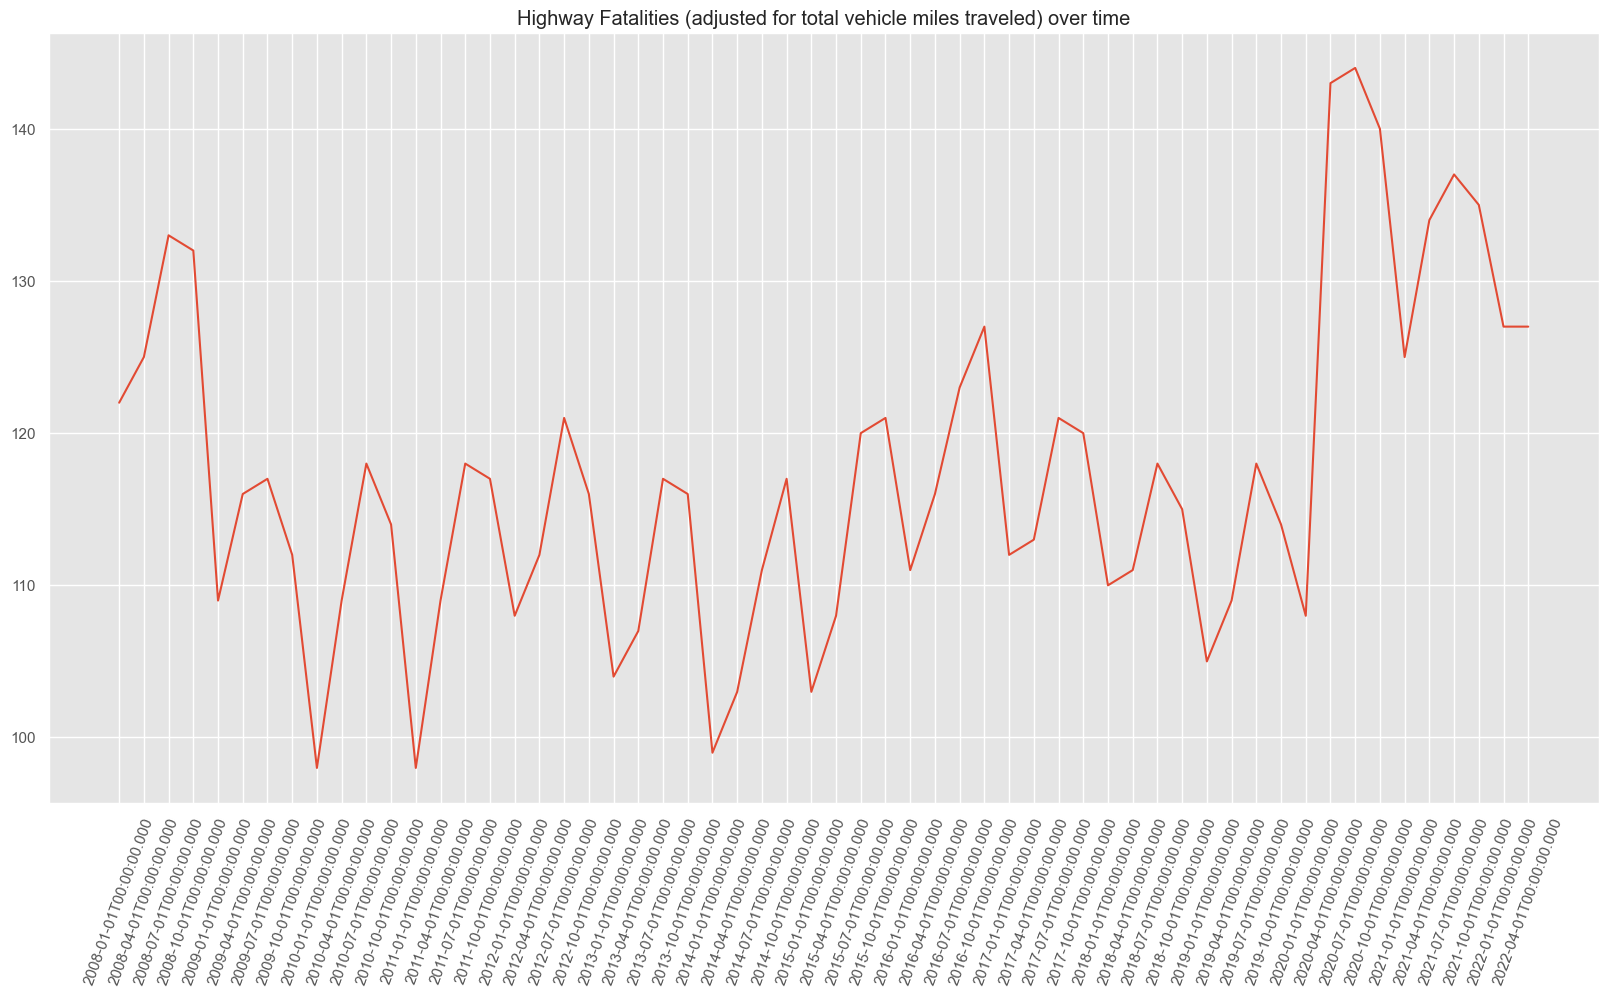

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(fatalities['date'], fatalities["fatalities"].apply(lambda x: float(x)))
plt.title("Highway Fatalities (adjusted for total vehicle miles traveled) over time")
plt.xticks(rotation=70);

In [43]:
X = fatalities[['gas_price', 'truck_employ', 
                'pers_spend', 'lab_force_partic', 'auto_sales', 'highway_spending',
               'month_Apr', 'month_Jan', 'month_Jul', 'month_Oct']]
y = fatalities['fatalities']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
model_test = X_train.join(y_train)
model_test['month_Apr'] = np.sin(model_test['month_Apr'])
model_test['month_Jan'] = np.sin(model_test['month_Jan'])
model_test['month_Jul'] = np.sin(model_test['month_Jul'])
model_test['month_Oct'] = np.sin(model_test['month_Oct'])

model_test.head()

,gas_price,truck_employ,pers_spend,lab_force_partic,auto_sales,highway_spending,month_Apr,month_Jan,month_Jul,month_Oct,fatalities
822,2.794,1481100.0,3.890110e+11,0.626,647900.0,1012.3,0.000000,0.0,0.841309,0.000000,120.0
879,1.841,1413100.0,2.786420e+11,0.602,166400.0,732.5,0.841309,0.0,0.000000,0.000000,143.0
882,2.183,1461300.0,3.260220e+11,0.615,292600.0,1110.3,0.000000,0.0,0.841309,0.000000,144.0
894,3.136,1530700.0,4.257670e+11,0.617,304700.0,1077.6,0.000000,0.0,0.841309,0.000000,137.0
777,3.448,1330400.0,3.392430e+11,0.641,470100.0,848.5,0.000000,0.0,0.000000,0.841309,117.0


## Modeling and Testing Validity of a Poisson Likelihood

Let $X=$ # of Highway Fatalities, and 

$$\lambda_i = exp(q_0 + q_1 X_i)$$
$$X_{t} \sim Poisson(\lambda_{i})$$

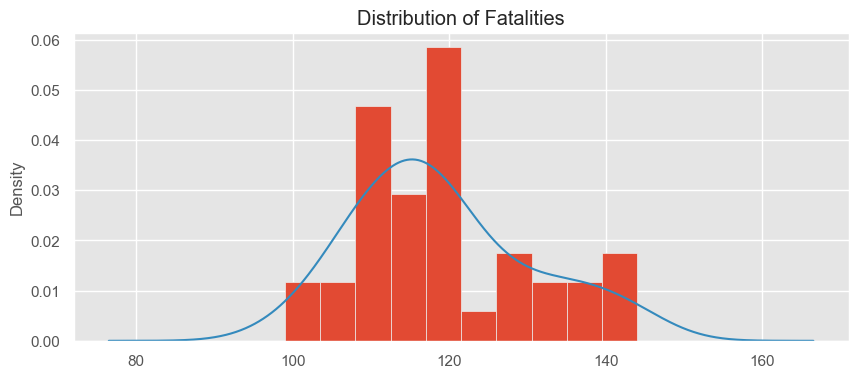

In [45]:
fig, ax = plt.subplots(figsize = (10,4))

model_test['fatalities'].plot(kind = "hist", density = True, bins = 10)
model_test['fatalities'].plot(kind='kde')
plt.title('Distribution of Fatalities');


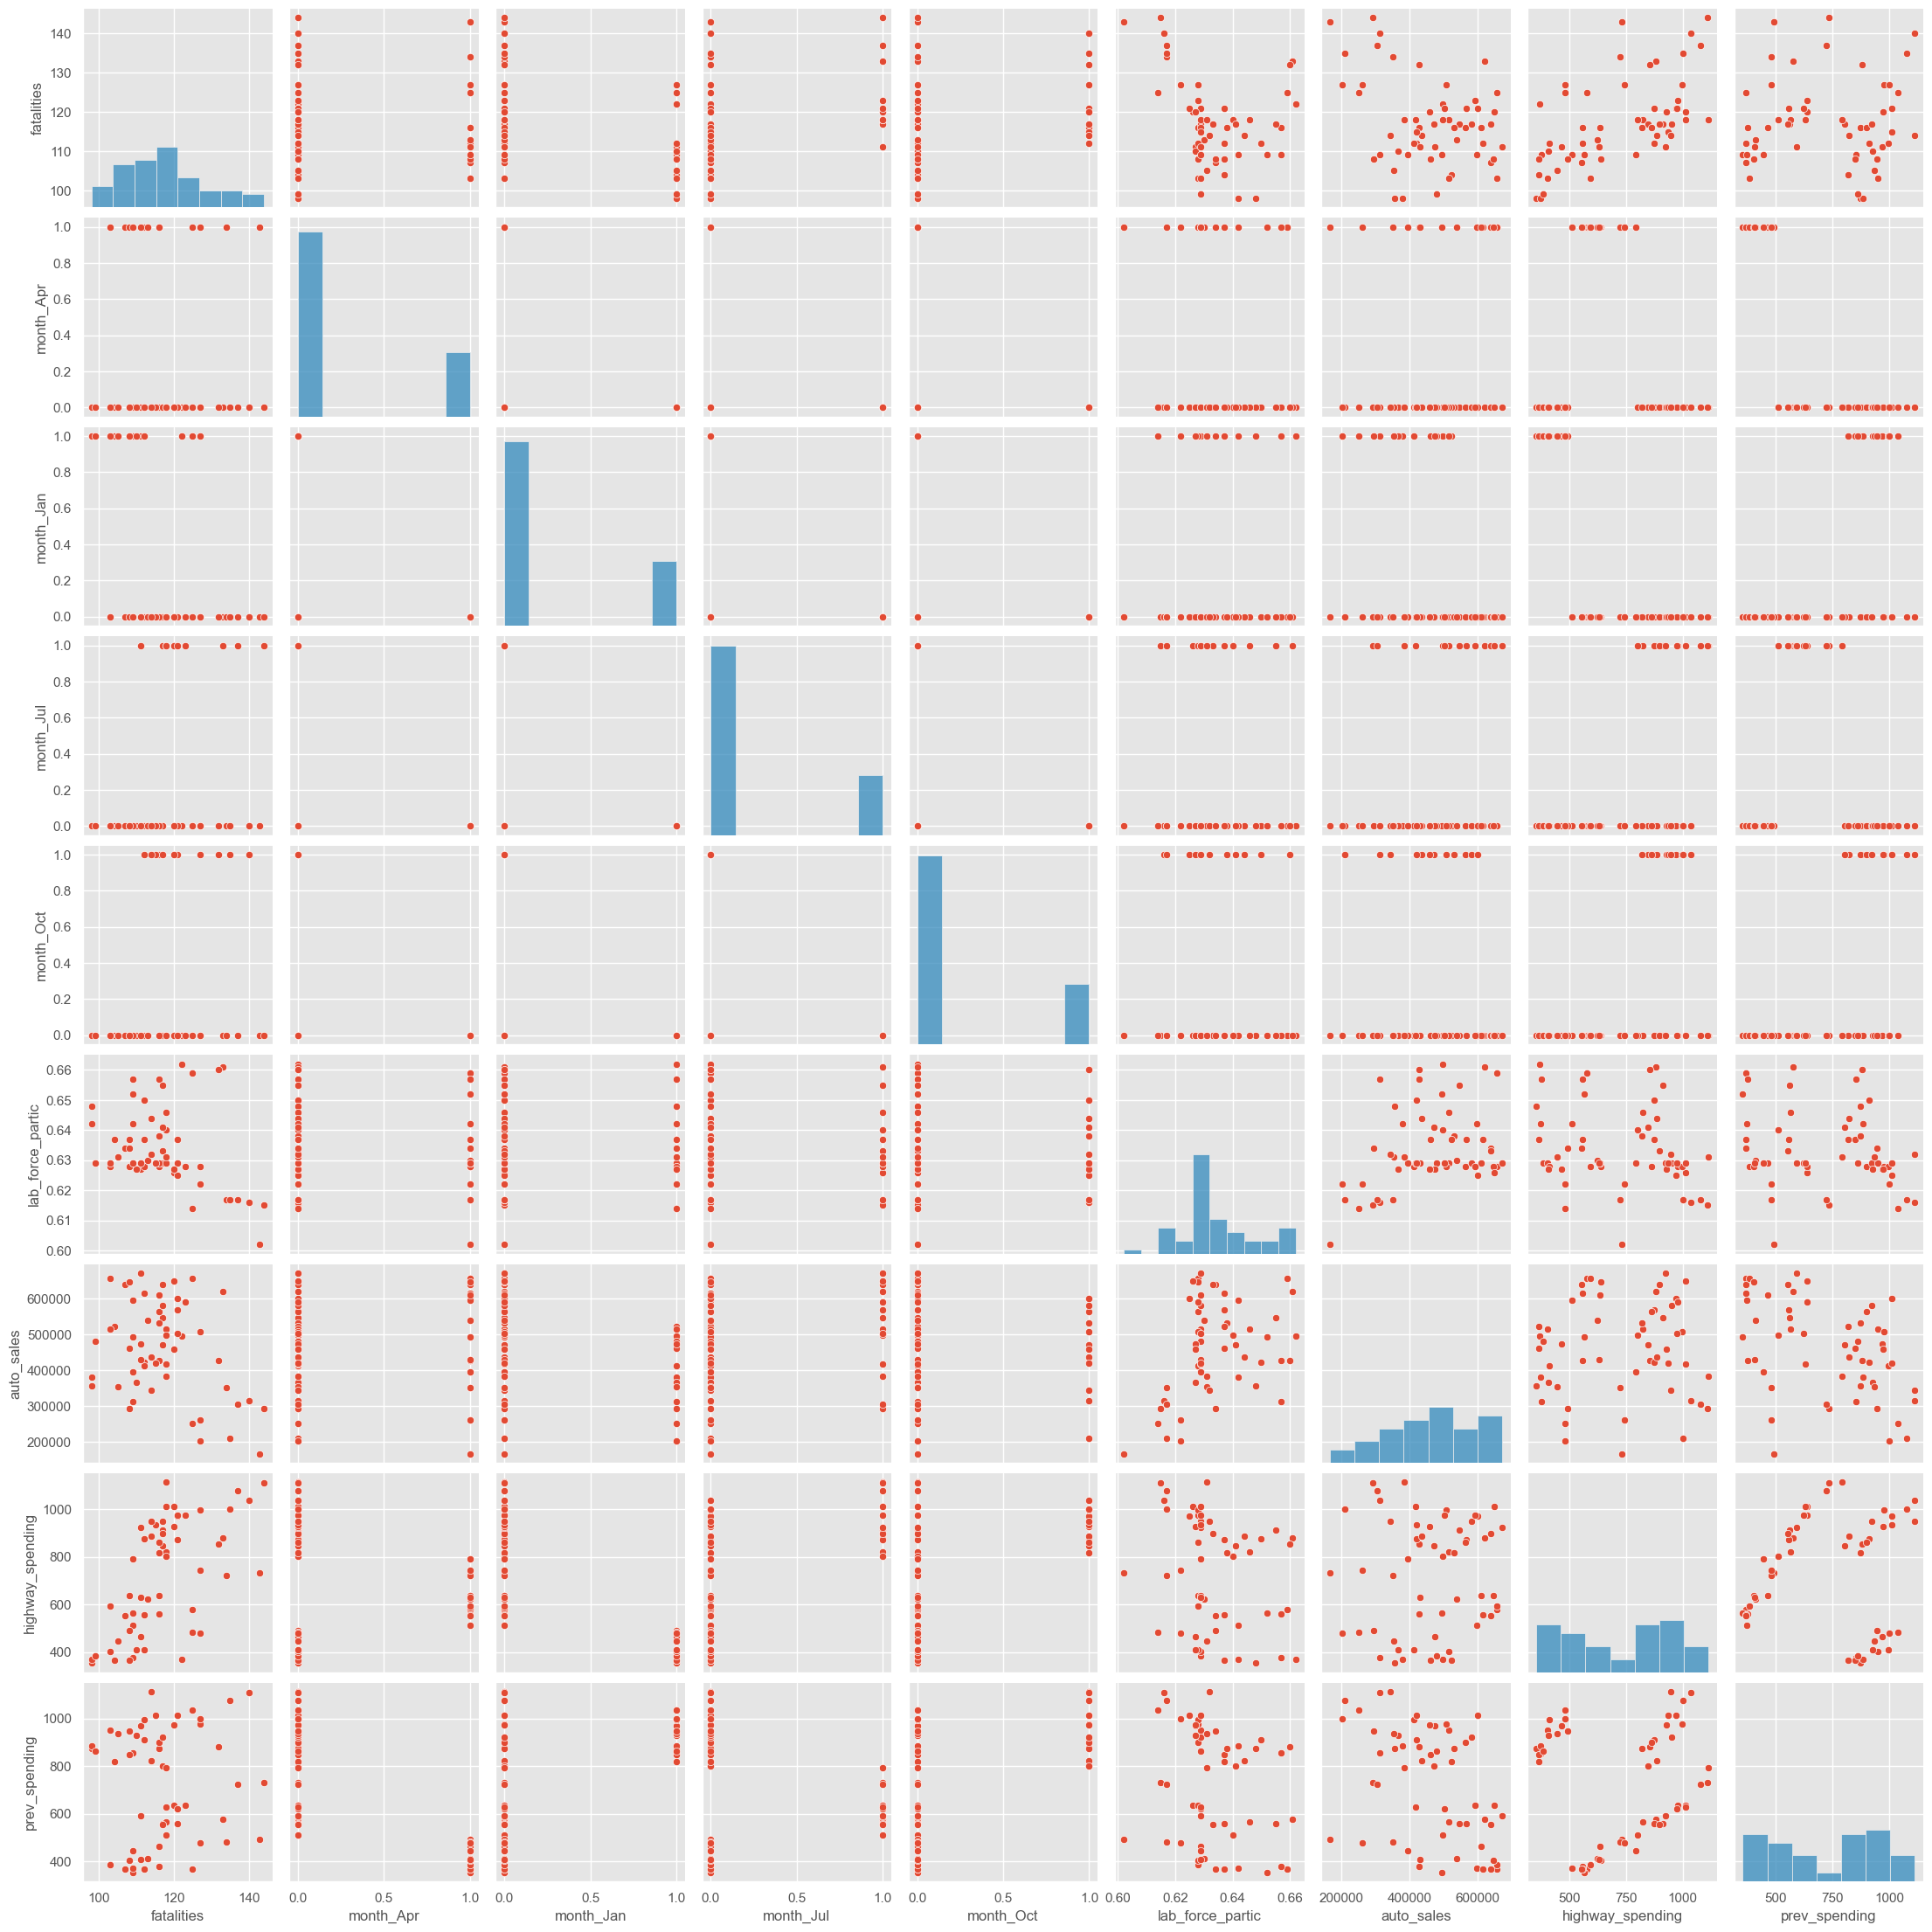

In [46]:
import seaborn as sns

corr_plot = fatalities[['fatalities', 'month_Apr', 'month_Jan', 'month_Jul','month_Oct', 
                        'lab_force_partic', 'auto_sales', 'highway_spending']]
corr_plot['prev_spending'] = corr_plot.highway_spending.shift(1)
corr_plot
sns.pairplot(corr_plot); 

In [47]:
import pymc3 as pm
import arviz as az
import statsmodels.api as sm


f_mod = fatalities.copy()
with pm.Model() as bayes_model:
    glm.GLM.from_formula('fatalities ~ highway_spending + lab_force_partic + month_Jan + month_Apr + month_Jul + month_Oct', model_test, family=glm.families.Poisson()) 
    # PYMC3 automatically uses exponential link function and adds an intercept term
    trace_poisson = pm.sample(1000, cores=2, target_accept=0.95, init='adapt_diag')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, month_Oct, month_Jul, month_Apr, month_Jan, lab_force_partic, highway_spending, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 119 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [48]:
bayes_model.basic_RVs

[Intercept ~ Flat,
 highway_spending ~ Normal,
 lab_force_partic ~ Normal,
 month_Jan ~ Normal,
 month_Apr ~ Normal,
 month_Jul ~ Normal,
 month_Oct ~ Normal,
 mu_log__ ~ TransformedDistribution,
 y ~ Poisson]

Got error No model on context stack. trying to find log_likelihood in translation.


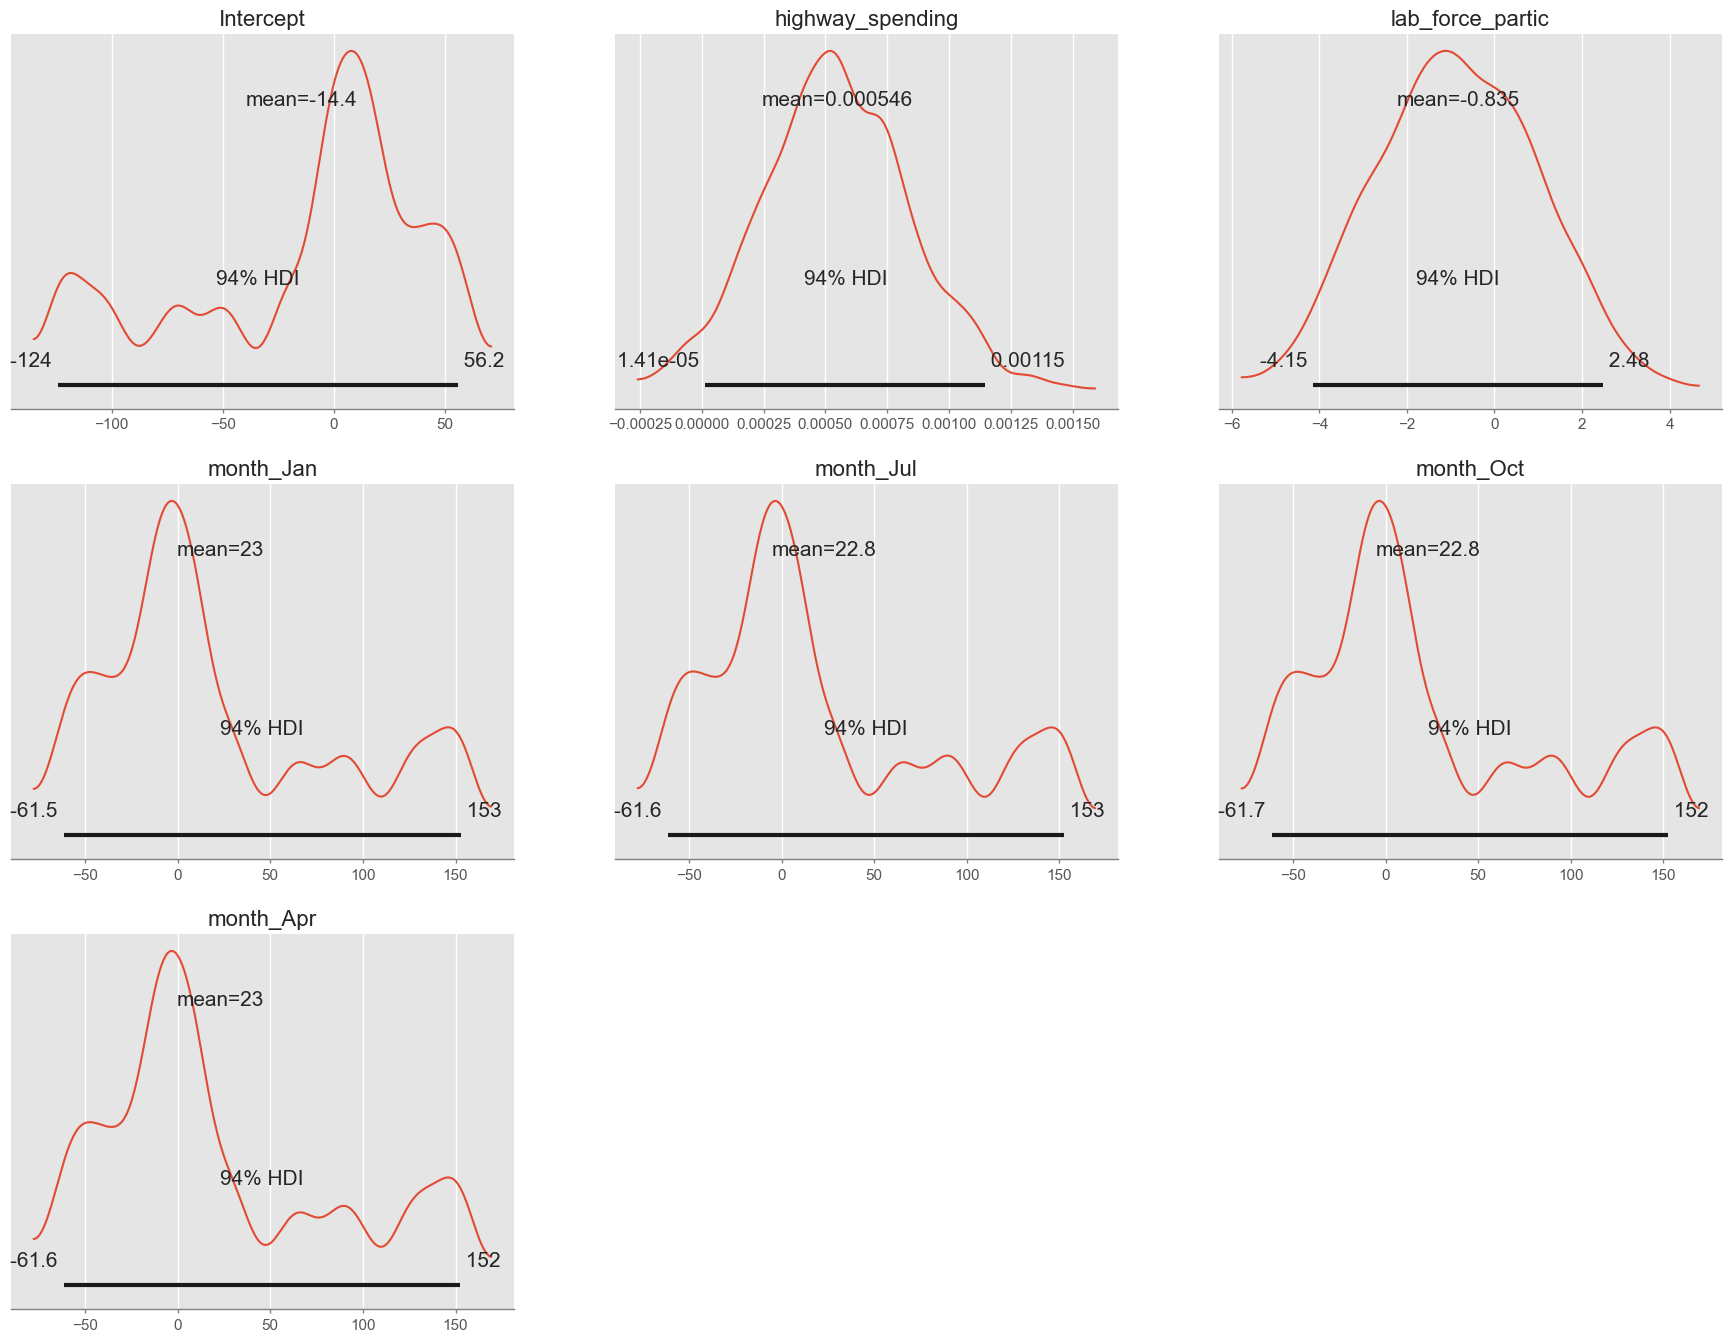

In [49]:
az.plot_posterior(trace_poisson, ['Intercept', 'highway_spending', 'lab_force_partic','month_Jan', 'month_Jul', 'month_Oct', 'month_Apr'], round_to = 3)
plt.show()

In [50]:
with pm.Model() as poisson_model:
    glm.GLM.from_formula('fatalities ~ highway_spending + lab_force_partic + month_Jan + month_Apr + month_Jul + month_Oct', model_test, family=glm.families.Poisson())
    # PYMC3 automatically uses exponential link function and adds an intercept term
    trace_poisson = pm.sample(1000, cores=2, target_accept=0.95, init='adapt_diag')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, month_Oct, month_Jul, month_Apr, month_Jan, lab_force_partic, highway_spending, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 120 seconds.
The acceptance probability does not match the target. It is 0.8978650116037697, but should be close to 0.95. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


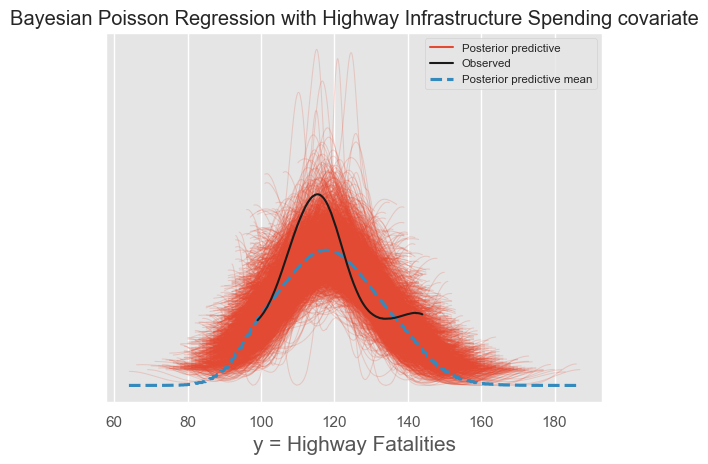

In [51]:
with poisson_model:
    poisson_ppc = pm.sample_posterior_predictive(trace_poisson)
    poisson_ppc['y'] = poisson_ppc['y'] + 0.0
    ppc_poisson = az.from_pymc3(trace_poisson, posterior_predictive=poisson_ppc)
        
# Plot PPC samples

az.plot_ppc(ppc_poisson)
plt.xlabel('y = Highway Fatalities')
plt.title('Bayesian Poisson Regression with Highway Infrastructure Spending covariate')
# plt.axis([-2, 45, -0.01, 0.2])

plt.show()

In [52]:
with pm.Model() as simple_bayes_model:
    mu = pm.Gamma('mu', alpha=10, beta=1)
    counts = pm.Poisson('C', mu=mu, observed=model_test.fatalities)
    simple_trace_poisson = pm.sample(1000, cores=2, target_accept=0.95, init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 9 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.


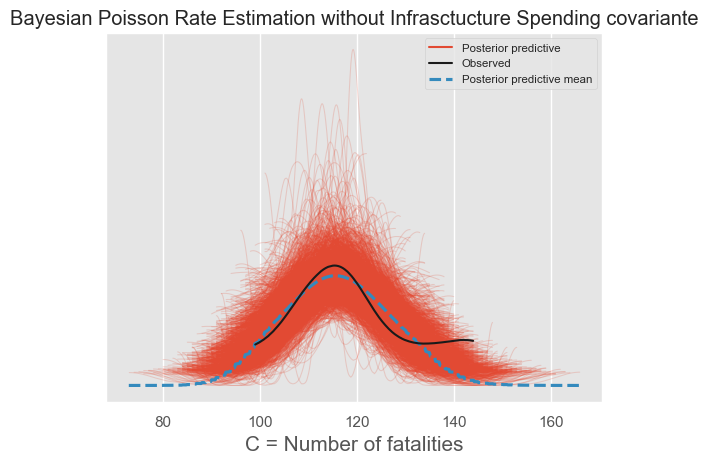

In [53]:
with simple_bayes_model:
        simple_bayes_ppc = pm.sample_posterior_predictive(simple_trace_poisson)
        simple_bayes_ppc['C'] = simple_bayes_ppc['C'] + 0.0

ppc_data = az.from_pymc3(simple_trace_poisson, posterior_predictive=simple_bayes_ppc)
az.plot_ppc(ppc_data)
plt.xlabel('C = Number of fatalities')
plt.title('Bayesian Poisson Rate Estimation without Infrasctucture Spending covariante')
plt.show()

# Multiple Hypothesis Testing

In [54]:
# Helper function
# Does the actual computation of statistic. P-value computation done in original function
def compute_avg_difference_in_means(df, binary_col, numerical_col):
    target_series = df.groupby(binary_col).mean()[numerical_col]
    observed_difference = abs(target_series[0] - target_series[1]) # false - true
    return observed_difference

def avg_difference_in_means(binary_col, numerical_col):
    # Reduce the df down to the columns interested
    reduced_df = df_camr_gdp_merged[[binary_col, numerical_col]]
    
    # Compute the observed difference
    observed_diff = compute_avg_difference_in_means(reduced_df, binary_col, numerical_col)
    
    # Repeat a bajillion (1000) times of shuffling labels and compute a bajillion differences
    diff_arr = []
    for _ in np.arange(1000): #### CHANGE THIS ####
        # Shuffle labels and compute the difference
        reduced_df['Shuffled Labels'] = reduced_df[binary_col].sample(len(reduced_df)).values
        shuffled_diff = compute_avg_difference_in_means(reduced_df, 'Shuffled Labels', numerical_col)
        diff_arr = np.append(diff_arr, shuffled_diff)
        
    # Determine which way to look to compute p-value, then compute p-value with diff_arr and observed_diff
    ### NOTE NEEDED ANYMORE SINCE CHANGED TO ABSOLUTE VALUE
    if observed_diff > 0: # positive, look in right direction
        p_val = np.count_nonzero(diff_arr >= observed_diff) / len(diff_arr)
    else:
        p_val = np.count_nonzero(diff_arr <= observed_diff) / len(diff_arr)
    
    # Graph to check LOL
    plt.figure()
    plt.hist(diff_arr)
    plt.axvline(observed_diff, color='red')
    plt.title('Prediction Under the Null')
    plt.xlabel('Difference Between Group Means')
    plt.ylabel('Percent per unit')
    plt.show();
    printStr = "Group: " + binary_col + "| Stat: " + numerical_col + " | Computed P-value: " + (str)(p_val) 
    print(printStr)
    print()
    
    return p_val

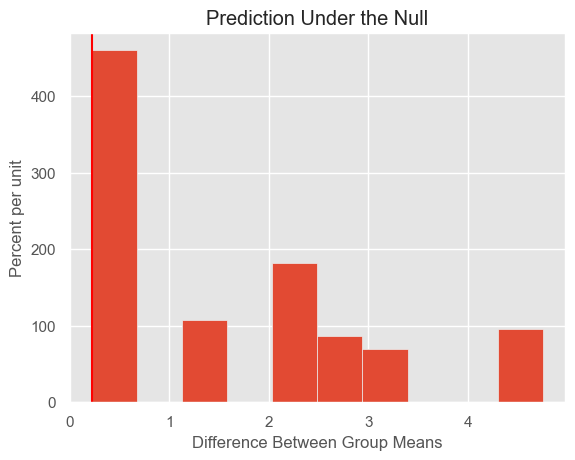

Group: retail/rec| Stat: Monthly_Percent_Change | Computed P-value: 1.0



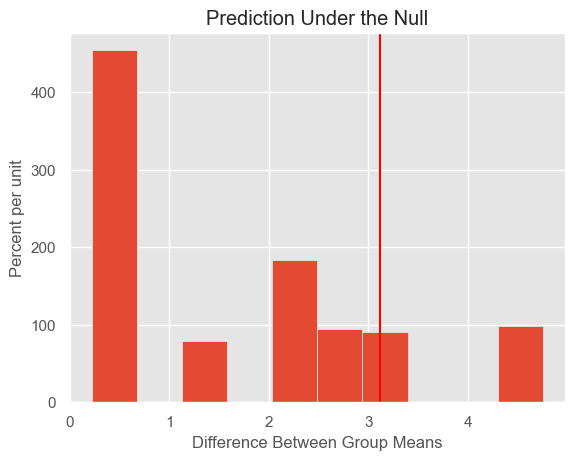

Group: grocery/pharm| Stat: Monthly_Percent_Change | Computed P-value: 0.189



In [55]:
# Print two at a time
p_values = []
for category in df_camr_gdp_merged.columns[1:3]:
    p_values = np.append(p_values, avg_difference_in_means(category, 'Monthly_Percent_Change'))

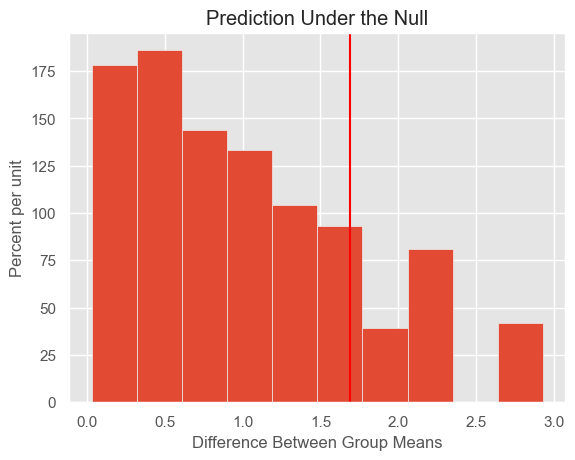

Group: parks| Stat: Monthly_Percent_Change | Computed P-value: 0.167



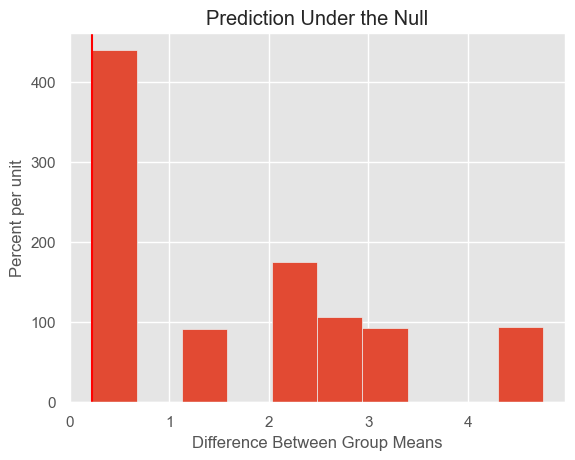

Group: transit_stations| Stat: Monthly_Percent_Change | Computed P-value: 1.0



In [56]:
for category in df_camr_gdp_merged.columns[3:5]:
    p_values = np.append(p_values, avg_difference_in_means(category, 'Monthly_Percent_Change'))

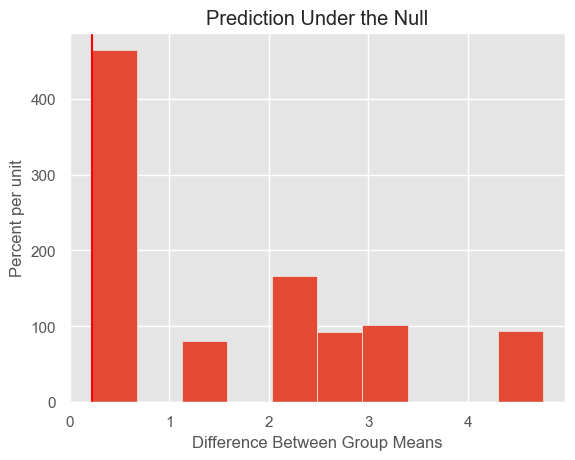

Group: workplaces| Stat: Monthly_Percent_Change | Computed P-value: 1.0



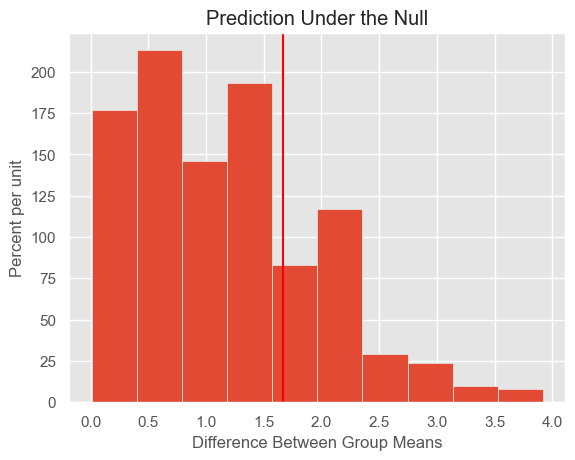

Group: residential| Stat: Monthly_Percent_Change | Computed P-value: 0.24



In [57]:
for category in df_camr_gdp_merged.columns[5:7]:
    p_values = np.append(p_values, avg_difference_in_means(category, 'Monthly_Percent_Change'))

In [58]:
# Helper function to print summary
def print_summary(categories):
    p_value_index = 0
    for category in categories:
        print("Category: {}\nNumerical: Monthly Percent Change".format(category))
        print("Computed P-value: {}".format(p_values[p_value_index]))
        print()
        p_value_index += 1

main_categories = df_camr_gdp_merged.columns[1:-1] # instantiated a variable because going going to need this later
print_summary(main_categories)

Category: retail/rec
Numerical: Monthly Percent Change
Computed P-value: 1.0

Category: grocery/pharm
Numerical: Monthly Percent Change
Computed P-value: 0.189

Category: parks
Numerical: Monthly Percent Change
Computed P-value: 0.167

Category: transit_stations
Numerical: Monthly Percent Change
Computed P-value: 1.0

Category: workplaces
Numerical: Monthly Percent Change
Computed P-value: 1.0

Category: residential
Numerical: Monthly Percent Change
Computed P-value: 0.24



In [59]:
# Helper function
def naive_reject_null(test):
    test_reject = test <= 0.2
    return [test_reject, "Reject null given alpha = 0.2? " + ("Yes" if test_reject else "No")]

# Helper function for printing summary using naive test rejection
def naive_reject_summary(categories):
    total_rejected = 0
    p_value_index = 0
    for category in categories:
        print("Category: {}\nNumerical: Monthly Percent Change".format(category))
        print("Computed P-value: {}".format(p_values[p_value_index]))
        naive_reject_null_results = naive_reject_null(p_values[p_value_index])
        total_rejected += naive_reject_null_results[0]
        print(naive_reject_null_results[1])
        print()
        p_value_index += 1
        
    # Print total number of tests rejected
    print('Total test(s) rejected: {}'.format(total_rejected))

# Call the helpers
naive_reject_summary(main_categories)

Category: retail/rec
Numerical: Monthly Percent Change
Computed P-value: 1.0
Reject null given alpha = 0.2? No

Category: grocery/pharm
Numerical: Monthly Percent Change
Computed P-value: 0.189
Reject null given alpha = 0.2? Yes

Category: parks
Numerical: Monthly Percent Change
Computed P-value: 0.167
Reject null given alpha = 0.2? Yes

Category: transit_stations
Numerical: Monthly Percent Change
Computed P-value: 1.0
Reject null given alpha = 0.2? No

Category: workplaces
Numerical: Monthly Percent Change
Computed P-value: 1.0
Reject null given alpha = 0.2? No

Category: residential
Numerical: Monthly Percent Change
Computed P-value: 0.24
Reject null given alpha = 0.2? No

Total test(s) rejected: 2


In [60]:
# Helper function for bonferroni correction
def bonferroni_reject_null(test, fwer_thresh):
    test_reject = test <= fwer_thresh
    return [test_reject, "Reject null given we want FWER of 0.2? " + ("Yes" if test_reject else "No")]

def bonferroni_reject_summary(categories):
    fwer_thresh = 0.2/6 # Number of tests = 6
    total_rejected = 0
    p_value_index = 0
    for category in categories:
        print("Category: {}\nNumerical: Monthly Percent Change".format(category))
        print("Computed P-value: {}".format(p_values[p_value_index]))
        bonferroni_reject_null_results = bonferroni_reject_null(p_values[p_value_index], fwer_thresh)
        total_rejected += bonferroni_reject_null_results[0]
        print(bonferroni_reject_null_results[1])
        print()
        p_value_index += 1
        
    # Print total number of tests rejected
    print('Total test(s) rejected: {}'.format(total_rejected))
    
# Call the helpers
bonferroni_reject_summary(main_categories)

Category: retail/rec
Numerical: Monthly Percent Change
Computed P-value: 1.0
Reject null given we want FWER of 0.2? No

Category: grocery/pharm
Numerical: Monthly Percent Change
Computed P-value: 0.189
Reject null given we want FWER of 0.2? No

Category: parks
Numerical: Monthly Percent Change
Computed P-value: 0.167
Reject null given we want FWER of 0.2? No

Category: transit_stations
Numerical: Monthly Percent Change
Computed P-value: 1.0
Reject null given we want FWER of 0.2? No

Category: workplaces
Numerical: Monthly Percent Change
Computed P-value: 1.0
Reject null given we want FWER of 0.2? No

Category: residential
Numerical: Monthly Percent Change
Computed P-value: 0.24
Reject null given we want FWER of 0.2? No

Total test(s) rejected: 0


In [61]:
# Apply B-H procedure with alpha = 0.2
# Discoveries: prediction = 1
# Took code from Lab01, modified to retrieve more information.
def benjamini_hochberg(p_values, alpha):
    """
    Returns decisions on p-values using Benjamini-Hochberg.
    
    Inputs:
        p_values: array of p-values
        alpha: desired FDR (FDR = E[# false positives / # positives])
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """
    sorted_p_values = np.sort(p_values)
    n = len(p_values)
    k = np.arange(1, n + 1)
    
    index = 0 # starting index to find p_value to be used as threshold in sorted_p_values
    for i in np.arange(0, n): # need to index start at 0 because of arrays
        if sorted_p_values[i] < (k[i] * alpha / n): # if p_value underneath the line
            index = i # keep updating until the entire list is iterated through
    
    threshold = sorted_p_values[index] # the index corresponds to the k - 1th element in the k array
    decisions = p_values <= threshold # TODO: fill in
    return [decisions, threshold, k]

In [62]:
# Dictionaries to help with prints
test_dict = {"test1": "Rejected test with Category: retail/rec and Numerical: Monthly Percent Change",
             "test2": "Rejected test with Category: grocery/pharm and Numerical: Monthly Percent Change",
             "test3": "Rejected test with Category: parks and Numerical: Monthly Percent Change",
             "test4": "Rejected test with Category: transit_stations and Numerical: Monthly Percent Change",
             "test5": "Rejected test with Category: workplaces and Numerical: Monthly Percent Changek",
             "test6": "Rejected test with Category: residential and Numerical: Monthly Percent Change"}

test_p_dict = {"test1": p_values[0],
               "test2": p_values[1],
               "test3": p_values[2],
               "test4": p_values[3],
               "test5": p_values[4],
               "test6": p_values[5]}

# Helper function to determine which tests were rejected by B-H procedure
def bh_reject_null(bh_info):
    reject_count = 0;
    i = 1
    for test in bh_info[0]:
        if test:
            print(test_dict['test'+(str)(i)])
            print("Computed P-value: {}".format(test_p_dict['test'+(str)(i)]))
            print()
            reject_count+=1
        i+=1
            
    print("Total test(s) rejected: {}".format(reject_count))

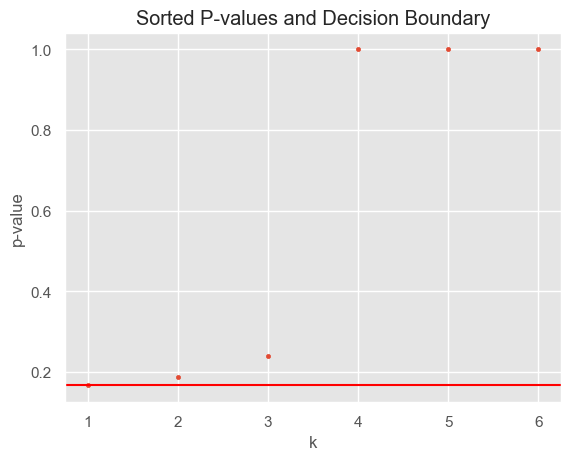

Threshold: 0.167
Total Discoveries: 1


In [63]:
# B-H procedure
bh_info = benjamini_hochberg(p_values, 0.2)
bh_discoveries = sum(bh_info[0])
bh_threshold = bh_info[1]
bh_ks = bh_info[2]

#.Plot the sorted p-values and decision boundary
plt.scatter(bh_ks, np.sort(p_values), marker='.')
plt.axhline(bh_threshold, color='red')
plt.title('Sorted P-values and Decision Boundary')
plt.xlabel('k')
plt.ylabel('p-value')
plt.show()

# Answer to "how many discoveries"
print("Threshold: {}\nTotal Discoveries: {}".format(bh_threshold, bh_discoveries))

# Multiple Hypothesis Testing Summary:
## Methods
- From how we categorized the data in our EDA, specifically if monthly absolute percentage change in the category **greater** than $10\%$, then it will be categorized as $1$ otherwise $0$, we are computing the average difference in the means of overall Monthly Percent Change of GDP in the United States as a whole. It makes sense to have multiple tests as these categories are all uniquely different but from EDA has a range of strong-weak associations with US GDP.
- To test our hypothesis, we will be using an A/B test that samples 1000 times (might be too little, may change in the future).
- To correct our tests, we will first use the naive way setting an $\alpha=0.2$. Then, we will use Bonferroni correction to set a family wise error rate (FWER) of $0.2$ and the and the Benjamini-Hochberg procedure to set a false discovery rate (FDR) of $0.2$. In terms of what they correct, FWER $=0.2$ means that the probability that at least one of our discoveries is incorrect is $0.2$. As for FDR, given that we have 6 tests, this means that the expected number of false discoveries is $0.2\times6=1.2$

# Results
- Summary was generated by code above. But will also print below:
- As explained in the Method section, the naive way of setting an $\alpha=0.2$ means that we control our false positive rate to be no greater than $0.2$. Then, we will use Bonferroni correction to set a family wise error rate (FWER) of $0.2$ and the and the Benjamini-Hochberg procedure to set a false discovery rate (FDR) of $0.2$. In terms of what they correct, FWER $=0.2$ means that the probability that at least one of our discoveries is incorrect is $0.2$. As for FDR, given that we have 6 tests, this means that the expected number of false discoveries is $0.2\times6=1.2$

In [64]:
# Summary for Naive Rejection
print("Using alpha = 0.2")
print()
print("---NAIVE REJECT SUMMARY---")
naive_reject_summary(main_categories)
print()

# Summary using Bonferonni correction
print("---BONFERRONI CORRECTION SUMMARY---")
bonferroni_reject_summary(main_categories)
print()

# Summary using Benjamini-Hochberg procedure
print("---BH-PROCEDURE SUMMARY---")
print("Threshold: {}\nTotal Discoveries: {}".format(bh_threshold, bh_discoveries))

Using alpha = 0.2

---NAIVE REJECT SUMMARY---
Category: retail/rec
Numerical: Monthly Percent Change
Computed P-value: 1.0
Reject null given alpha = 0.2? No

Category: grocery/pharm
Numerical: Monthly Percent Change
Computed P-value: 0.189
Reject null given alpha = 0.2? Yes

Category: parks
Numerical: Monthly Percent Change
Computed P-value: 0.167
Reject null given alpha = 0.2? Yes

Category: transit_stations
Numerical: Monthly Percent Change
Computed P-value: 1.0
Reject null given alpha = 0.2? No

Category: workplaces
Numerical: Monthly Percent Change
Computed P-value: 1.0
Reject null given alpha = 0.2? No

Category: residential
Numerical: Monthly Percent Change
Computed P-value: 0.24
Reject null given alpha = 0.2? No

Total test(s) rejected: 2

---BONFERRONI CORRECTION SUMMARY---
Category: retail/rec
Numerical: Monthly Percent Change
Computed P-value: 1.0
Reject null given we want FWER of 0.2? No

Category: grocery/pharm
Numerical: Monthly Percent Change
Computed P-value: 0.189
Rejec

# Causal Inference and GLMs